In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'ieee'])

# Rewards

## Random agent

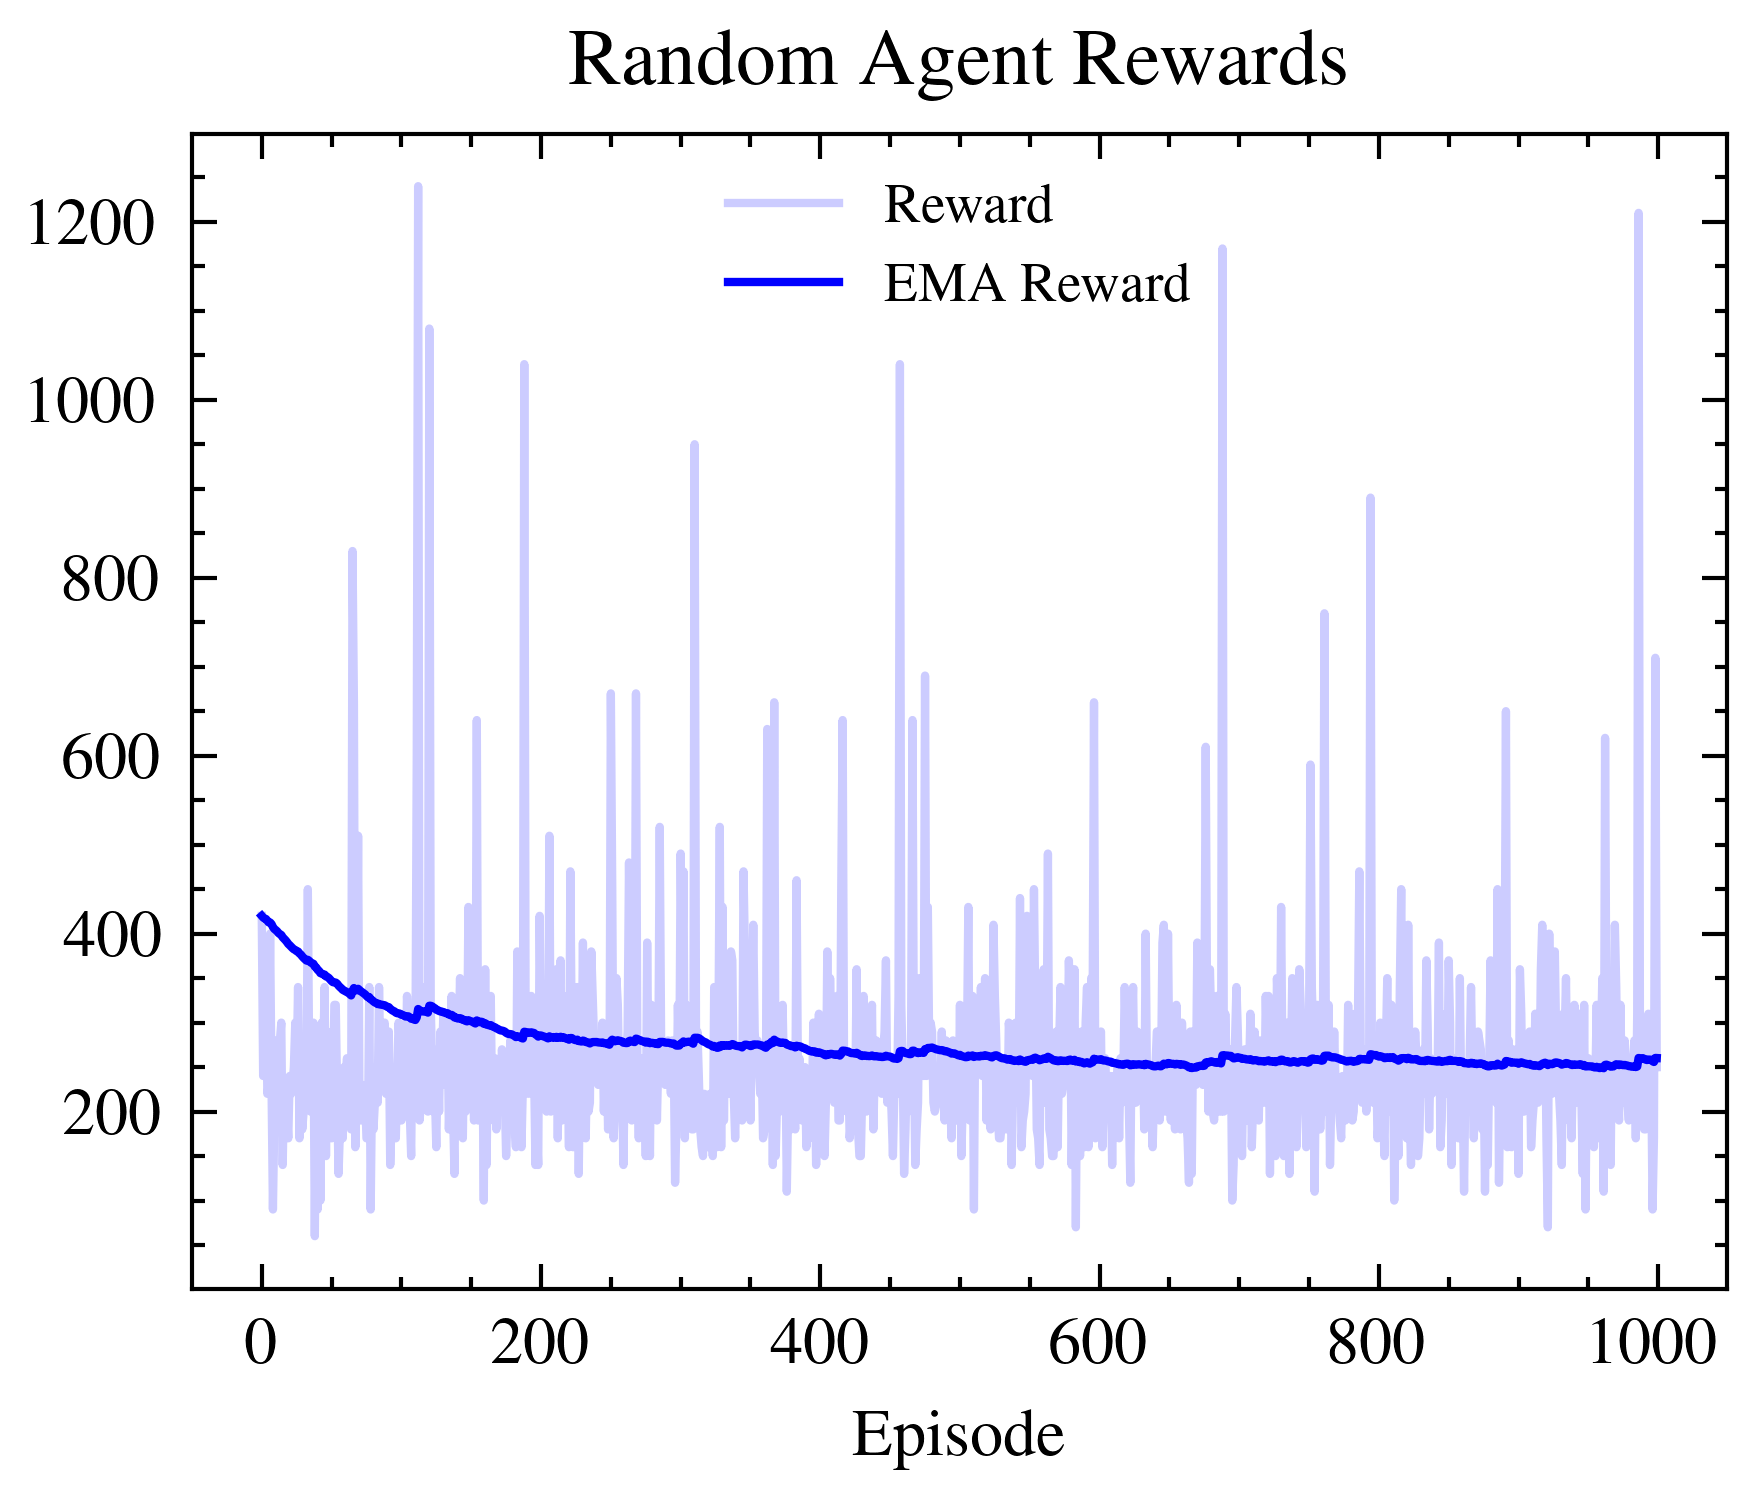

In [31]:
df = pd.read_csv('data/random_agent_results.csv')

df['EMA'] = df['reward'].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df['reward'], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('Random Agent Rewards')
plt.xlabel('Episode')
plt.savefig('plots/random-agent-rewards.png', dpi=300)

## Plots for data from WandB

### PPO

In [32]:
DF_FILE = "data/ppo_results.csv"
REWARD_COLUMN = "episode_rewards"

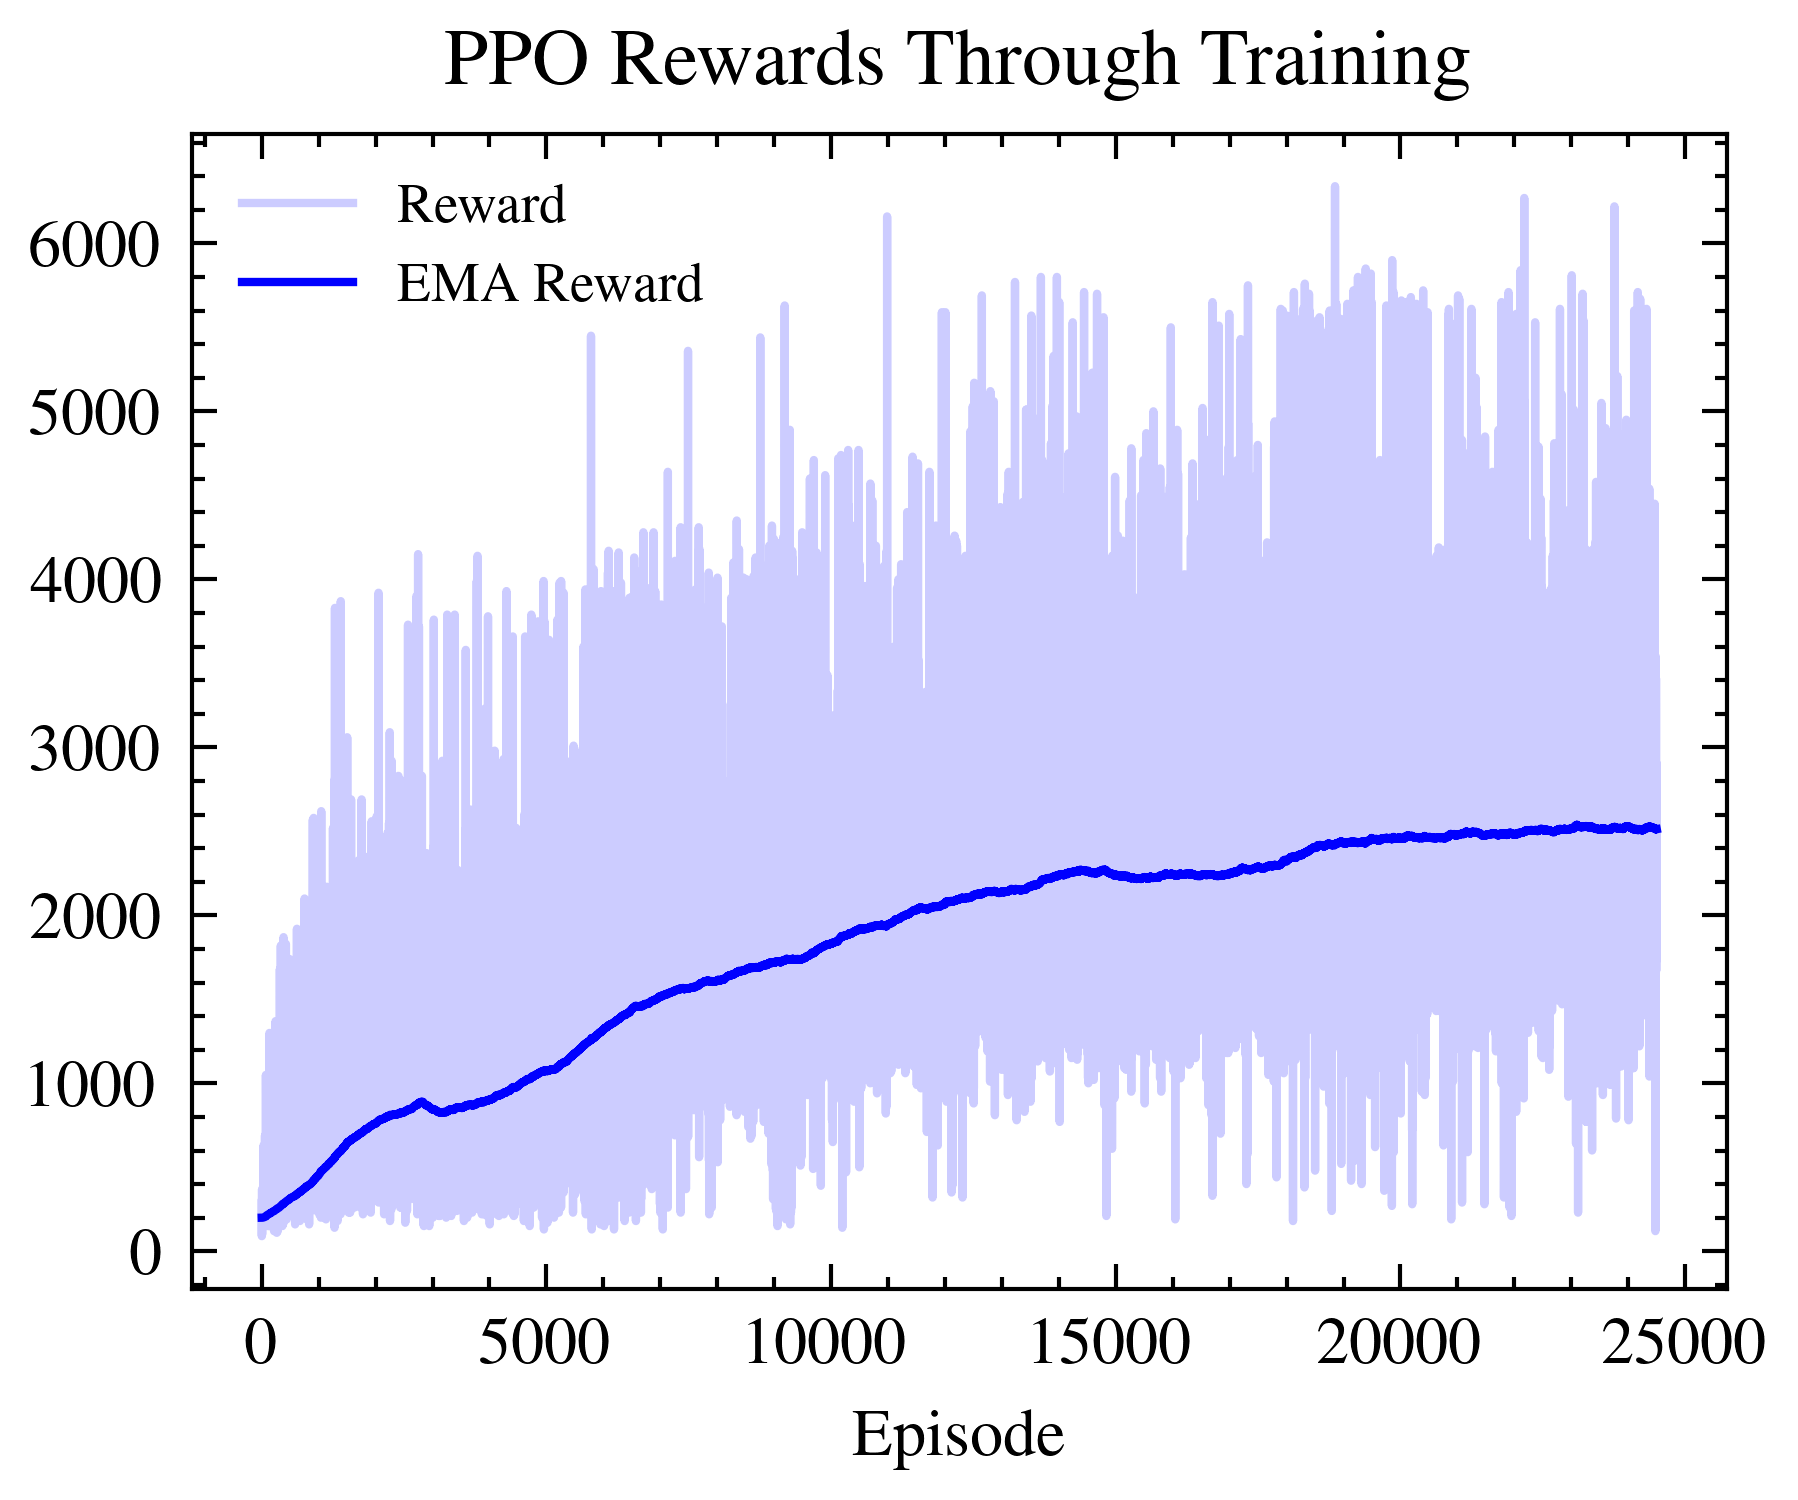

In [33]:
df = pd.read_csv(DF_FILE)

df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.001, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('PPO Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ppo-rewards.png', dpi=300)

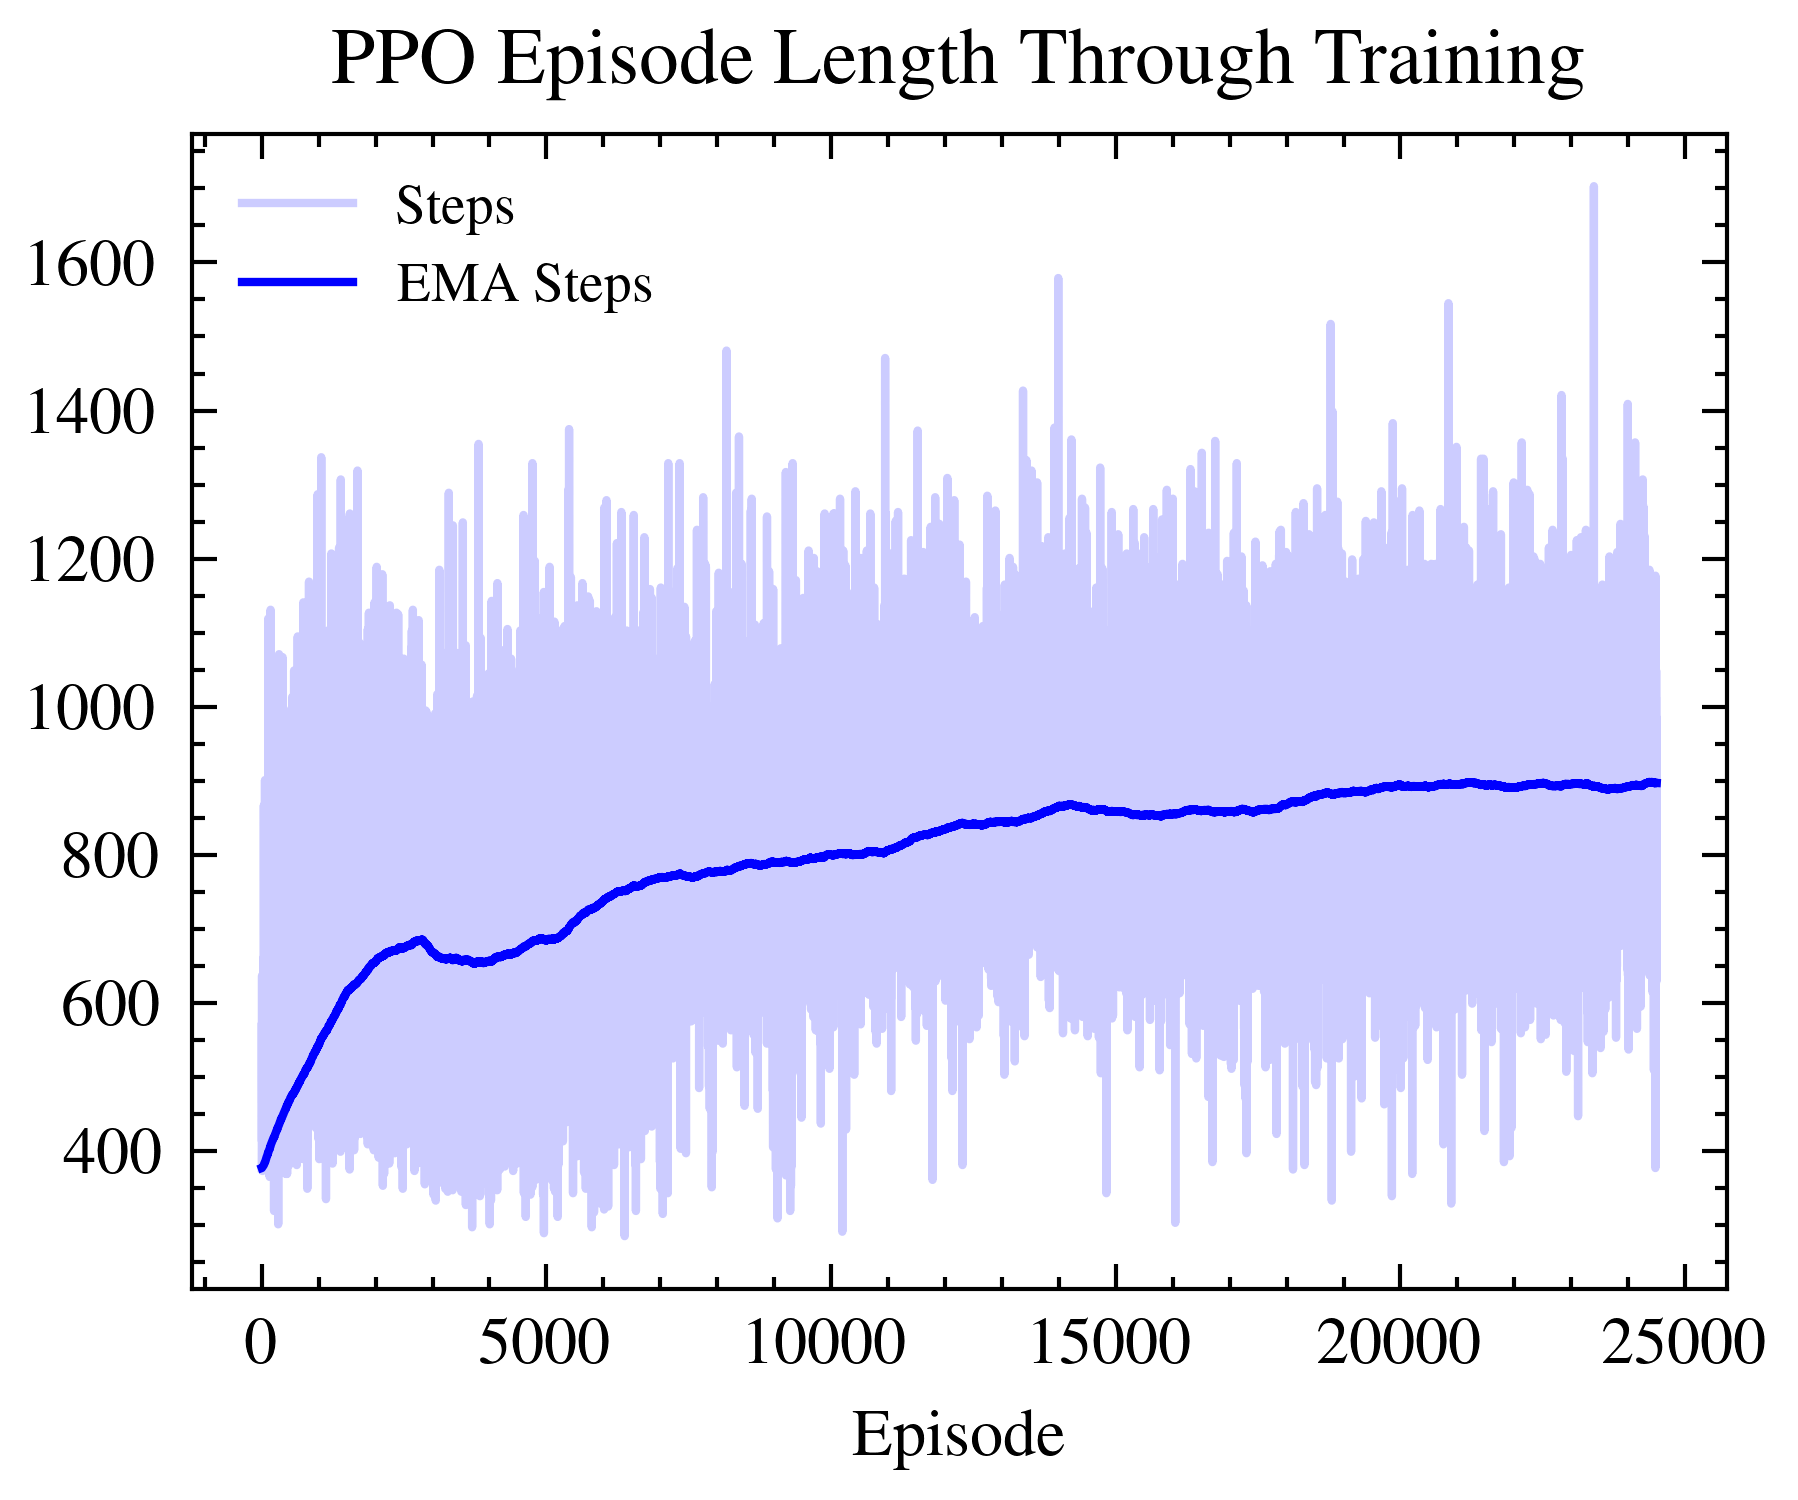

In [34]:
EPISODE_LENGTH_COLUMN = "episode_lengths"

df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.001, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('PPO Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ppo-episode-length.png', dpi=300)

### MuZero

In [27]:
DF_FILE = "data/muzero.csv"
REWARD_COLUMN = "reward"

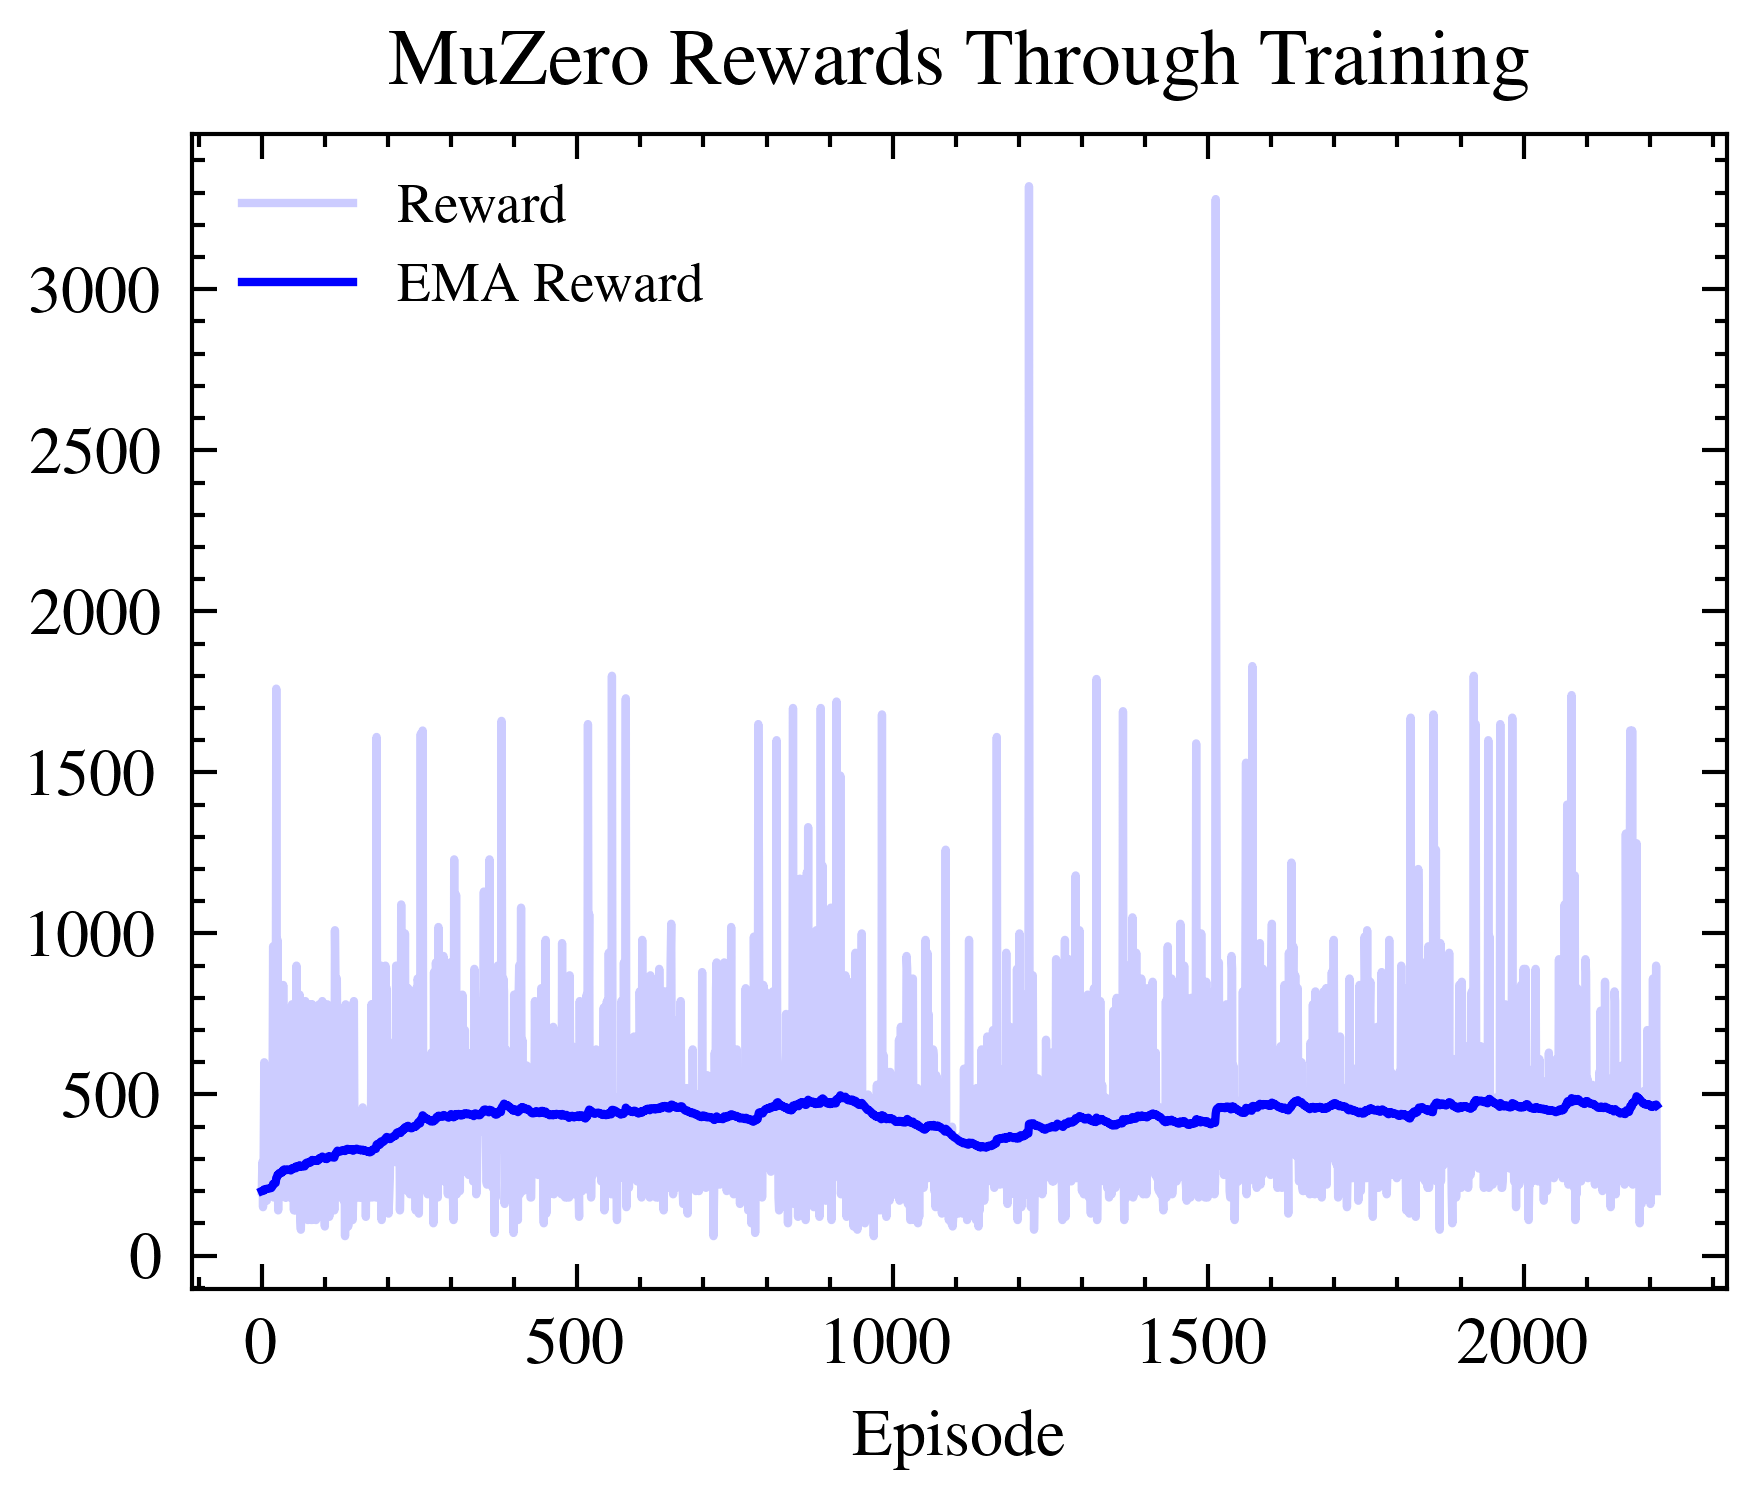

In [28]:
df = pd.read_csv(DF_FILE)

df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('MuZero Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/muzero_reward_actor_0.png', dpi=300)

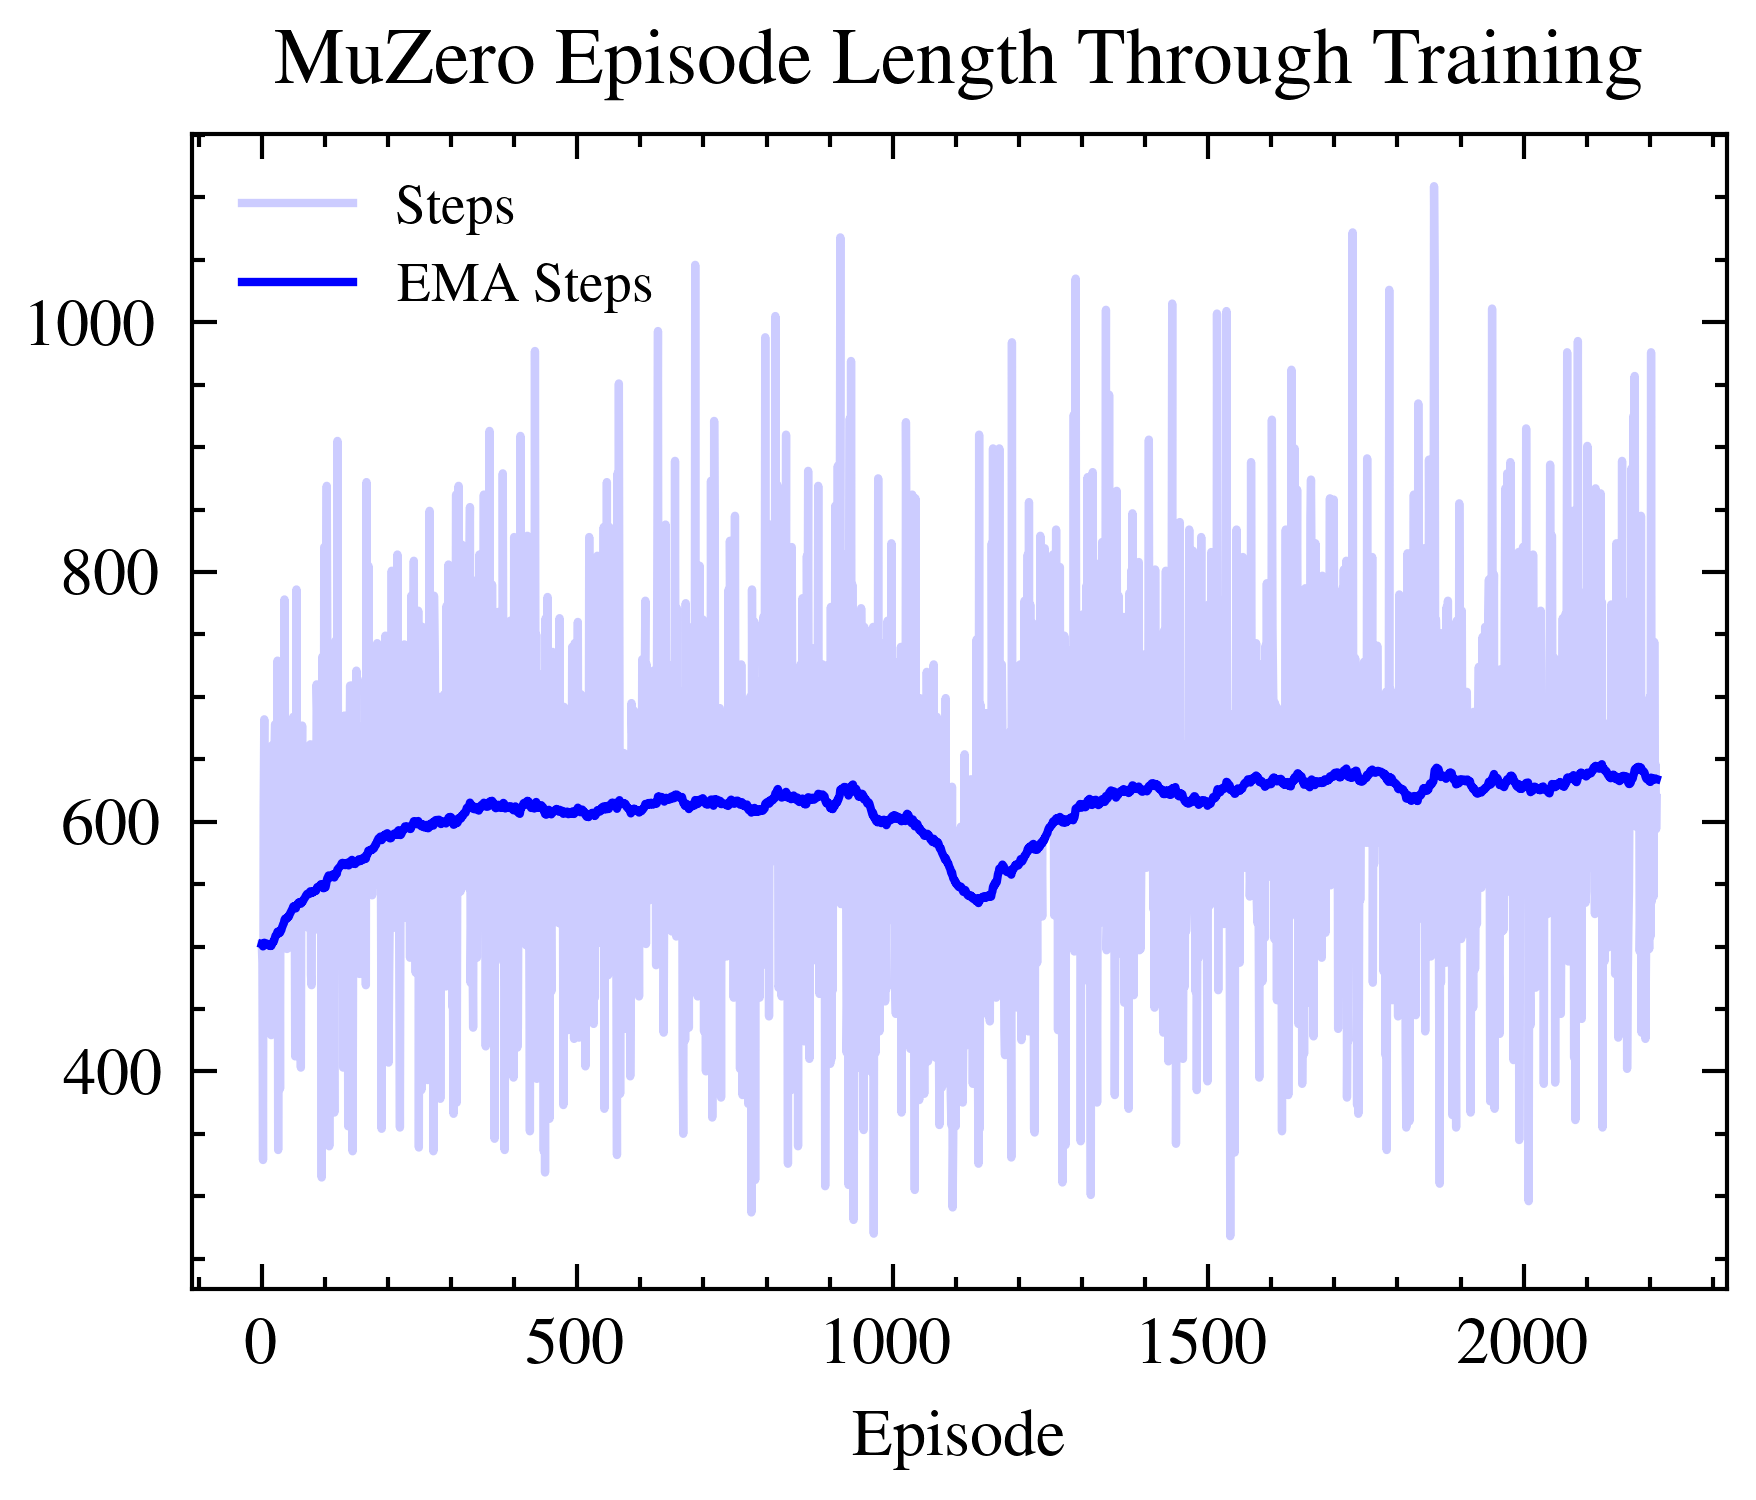

In [29]:
EPISODE_LENGTH_COLUMN = "game_length"

df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('MuZero Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/muzero-episode-length.png', dpi=300)

## MuZero Reanalyse

In [21]:
DF_FILE = "data/muzero_reanalyse.csv"
REWARD_COLUMN = "reward"

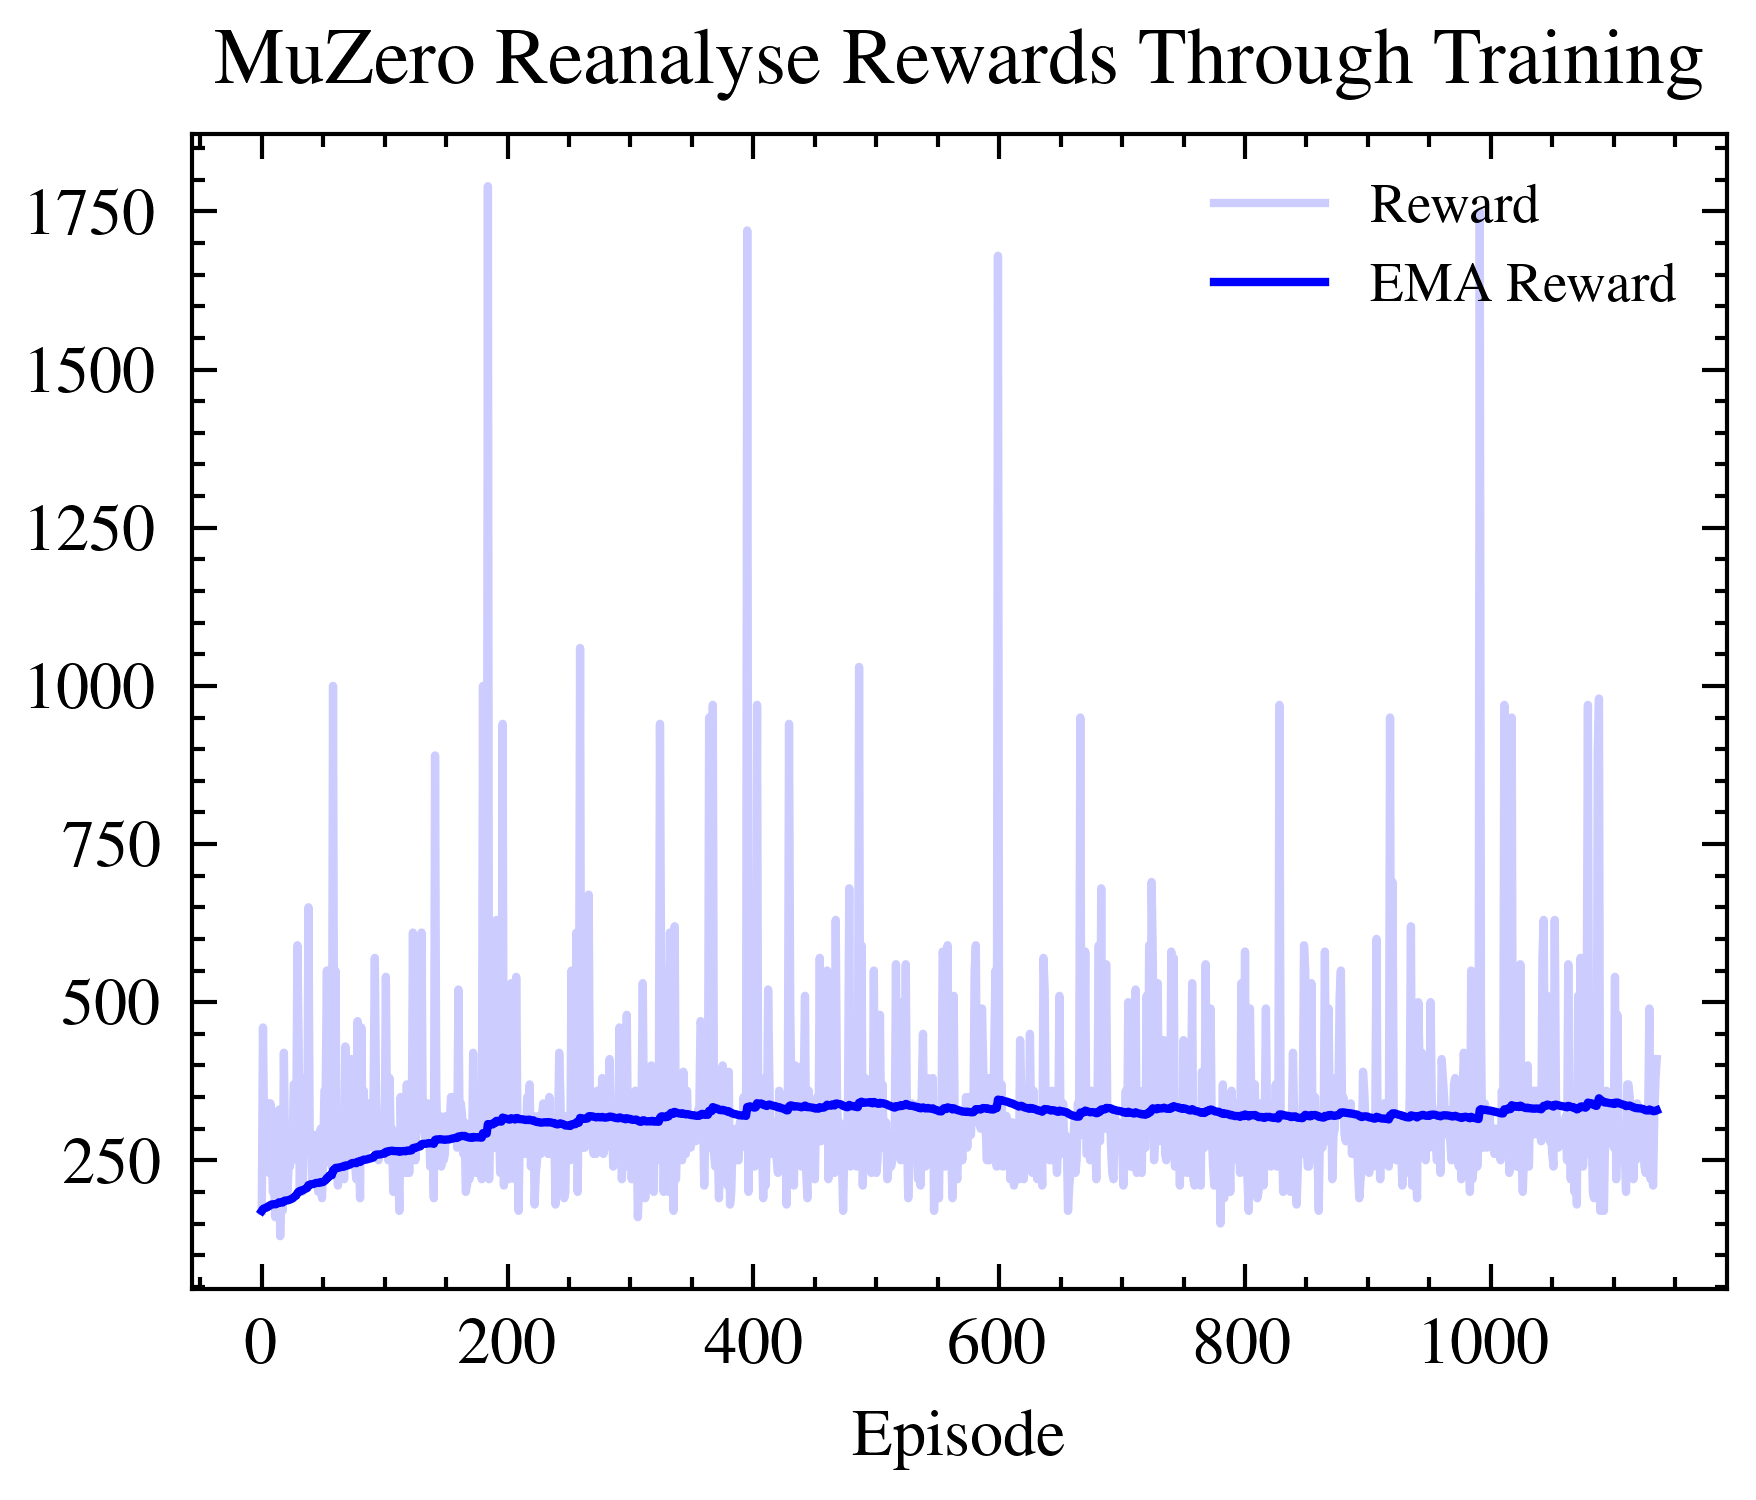

In [26]:
df = pd.read_csv(DF_FILE)

df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('MuZero Reanalyse Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/muzero_reanalyse_reward_actor_0.png', dpi=300)

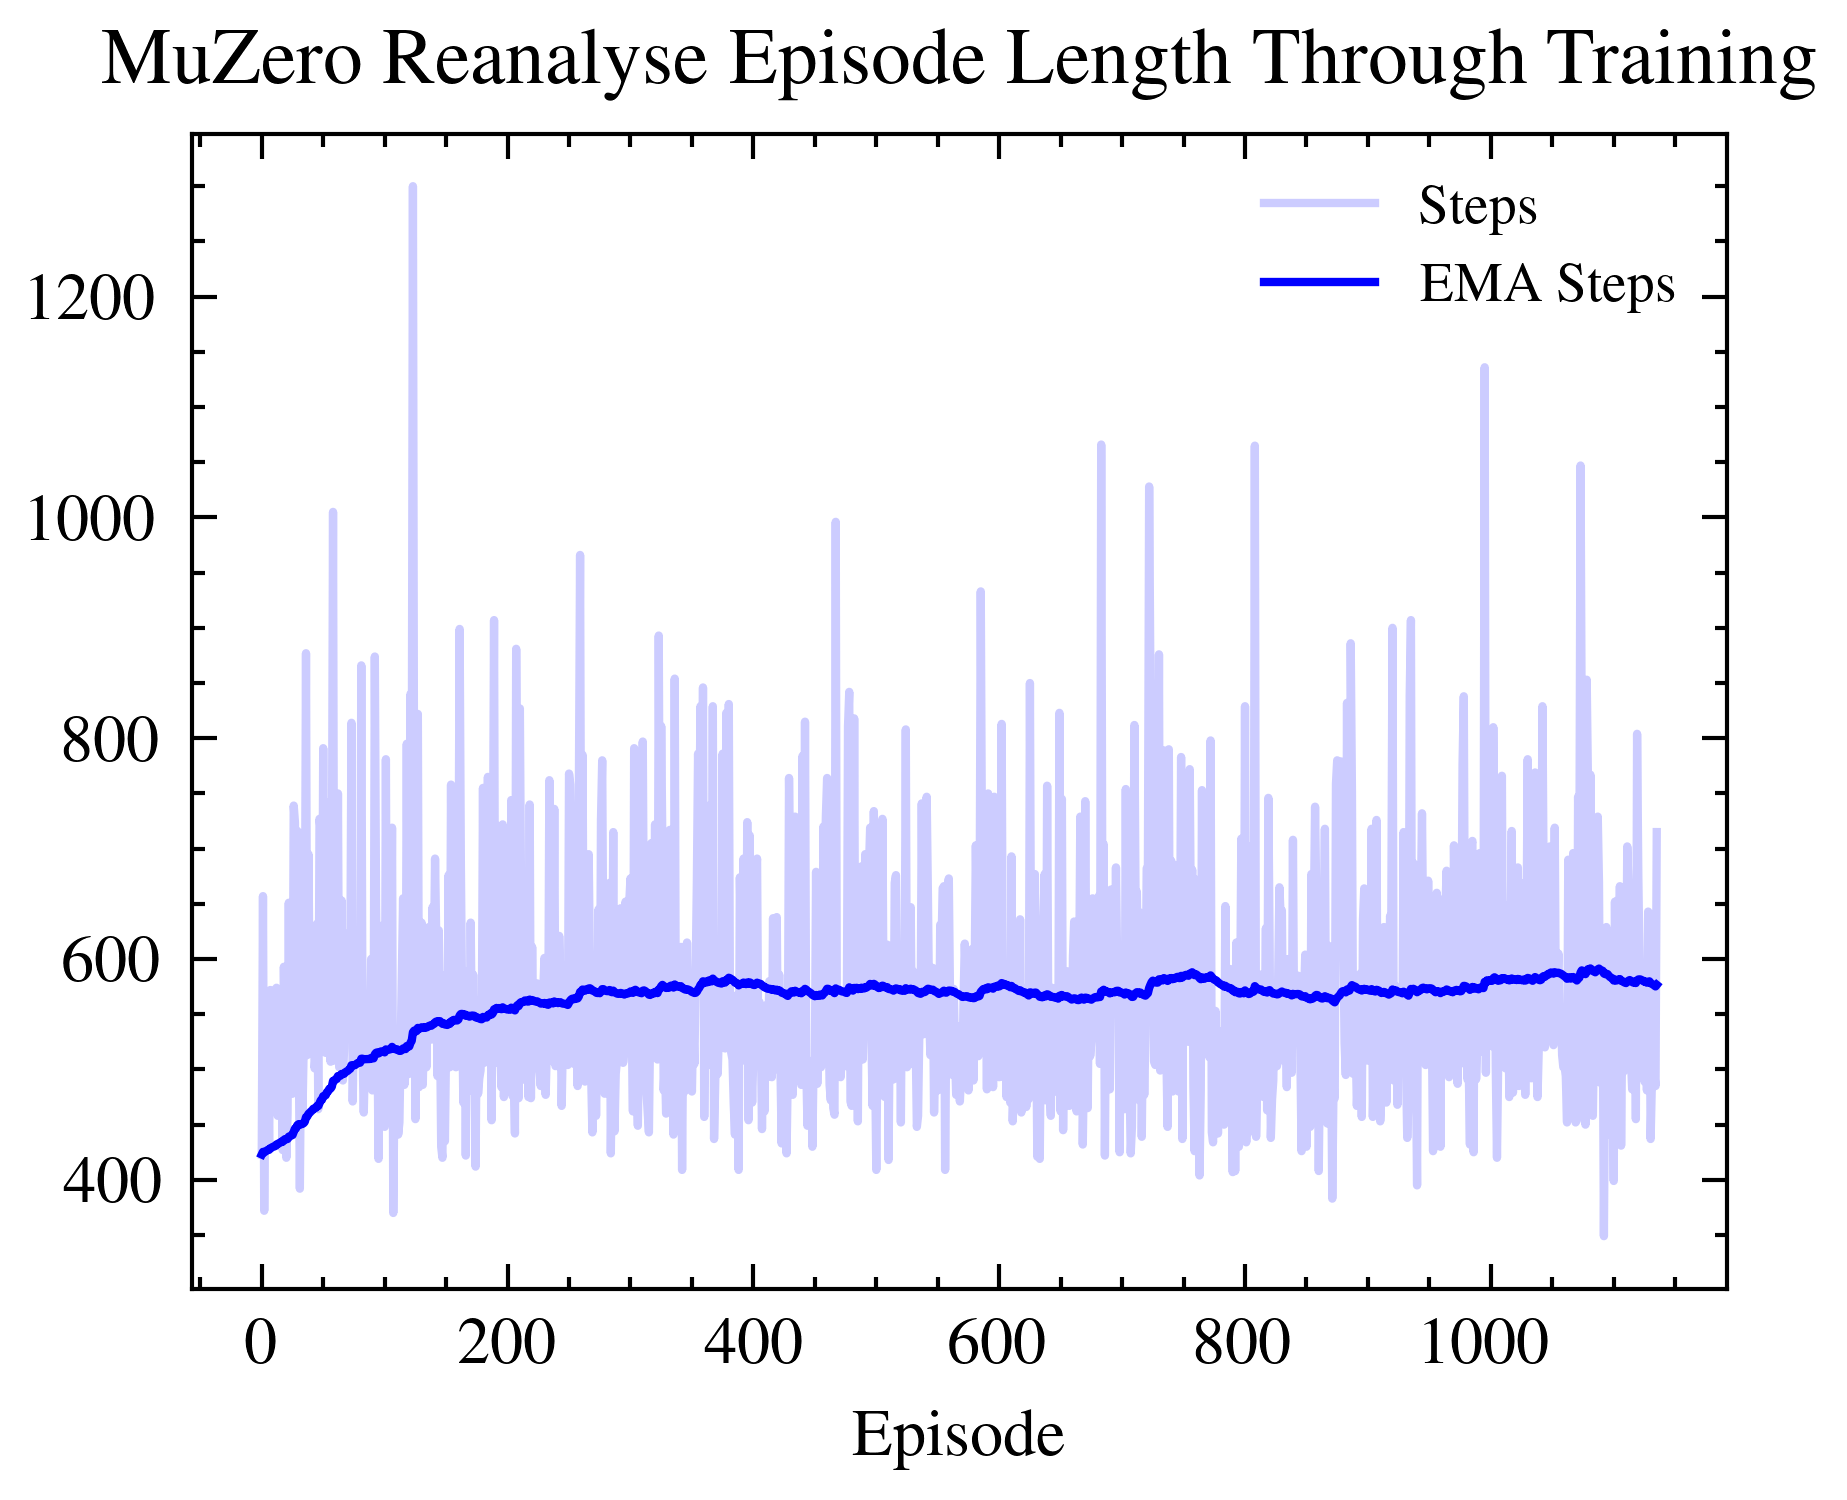

In [25]:
EPISODE_LENGTH_COLUMN = "game_length"

df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.01, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('MuZero Reanalyse Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/muzero-reanalyse-episode-length.png', dpi=300)

## Plots for data collected locally for DQN

In [48]:
df = pd.read_csv('../checkpoints/ddqn/smaller_min_epsilon_higher_discount_factor.csv', index_col=False)

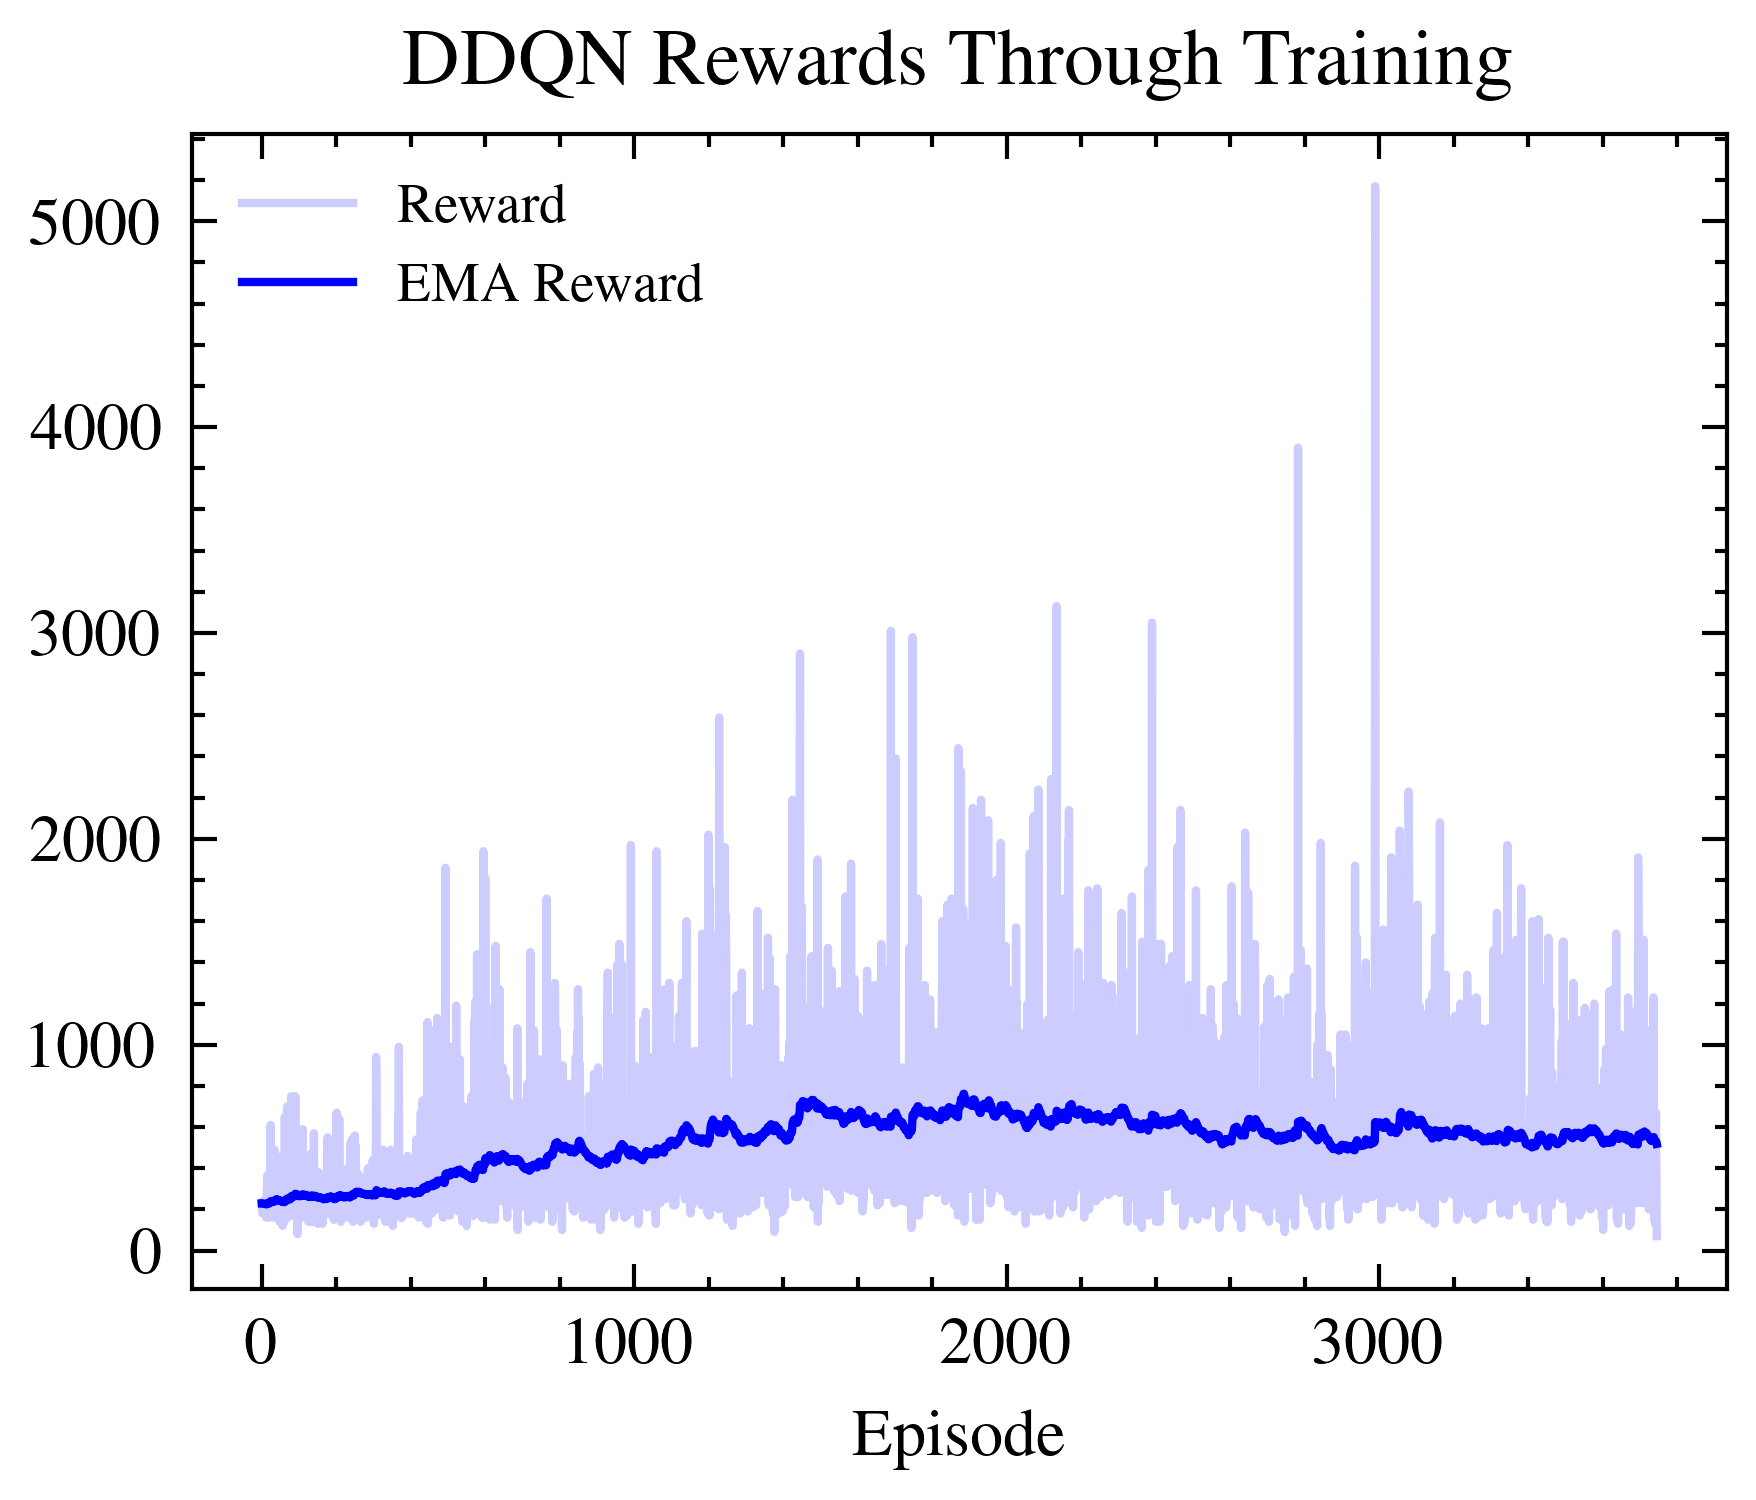

In [38]:
REWARD_COLUMN = 'reward' 
df = df.groupby('episode').sum()
df['EMA'] = df[REWARD_COLUMN].ewm(alpha=0.02, adjust=False).mean()

plt.plot(range(len(df)), df[REWARD_COLUMN], alpha=0.2, color='blue', label='Reward')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward')
plt.legend(fontsize='small')
plt.title('DDQN Rewards Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ddqn-rewards.png', dpi=300)

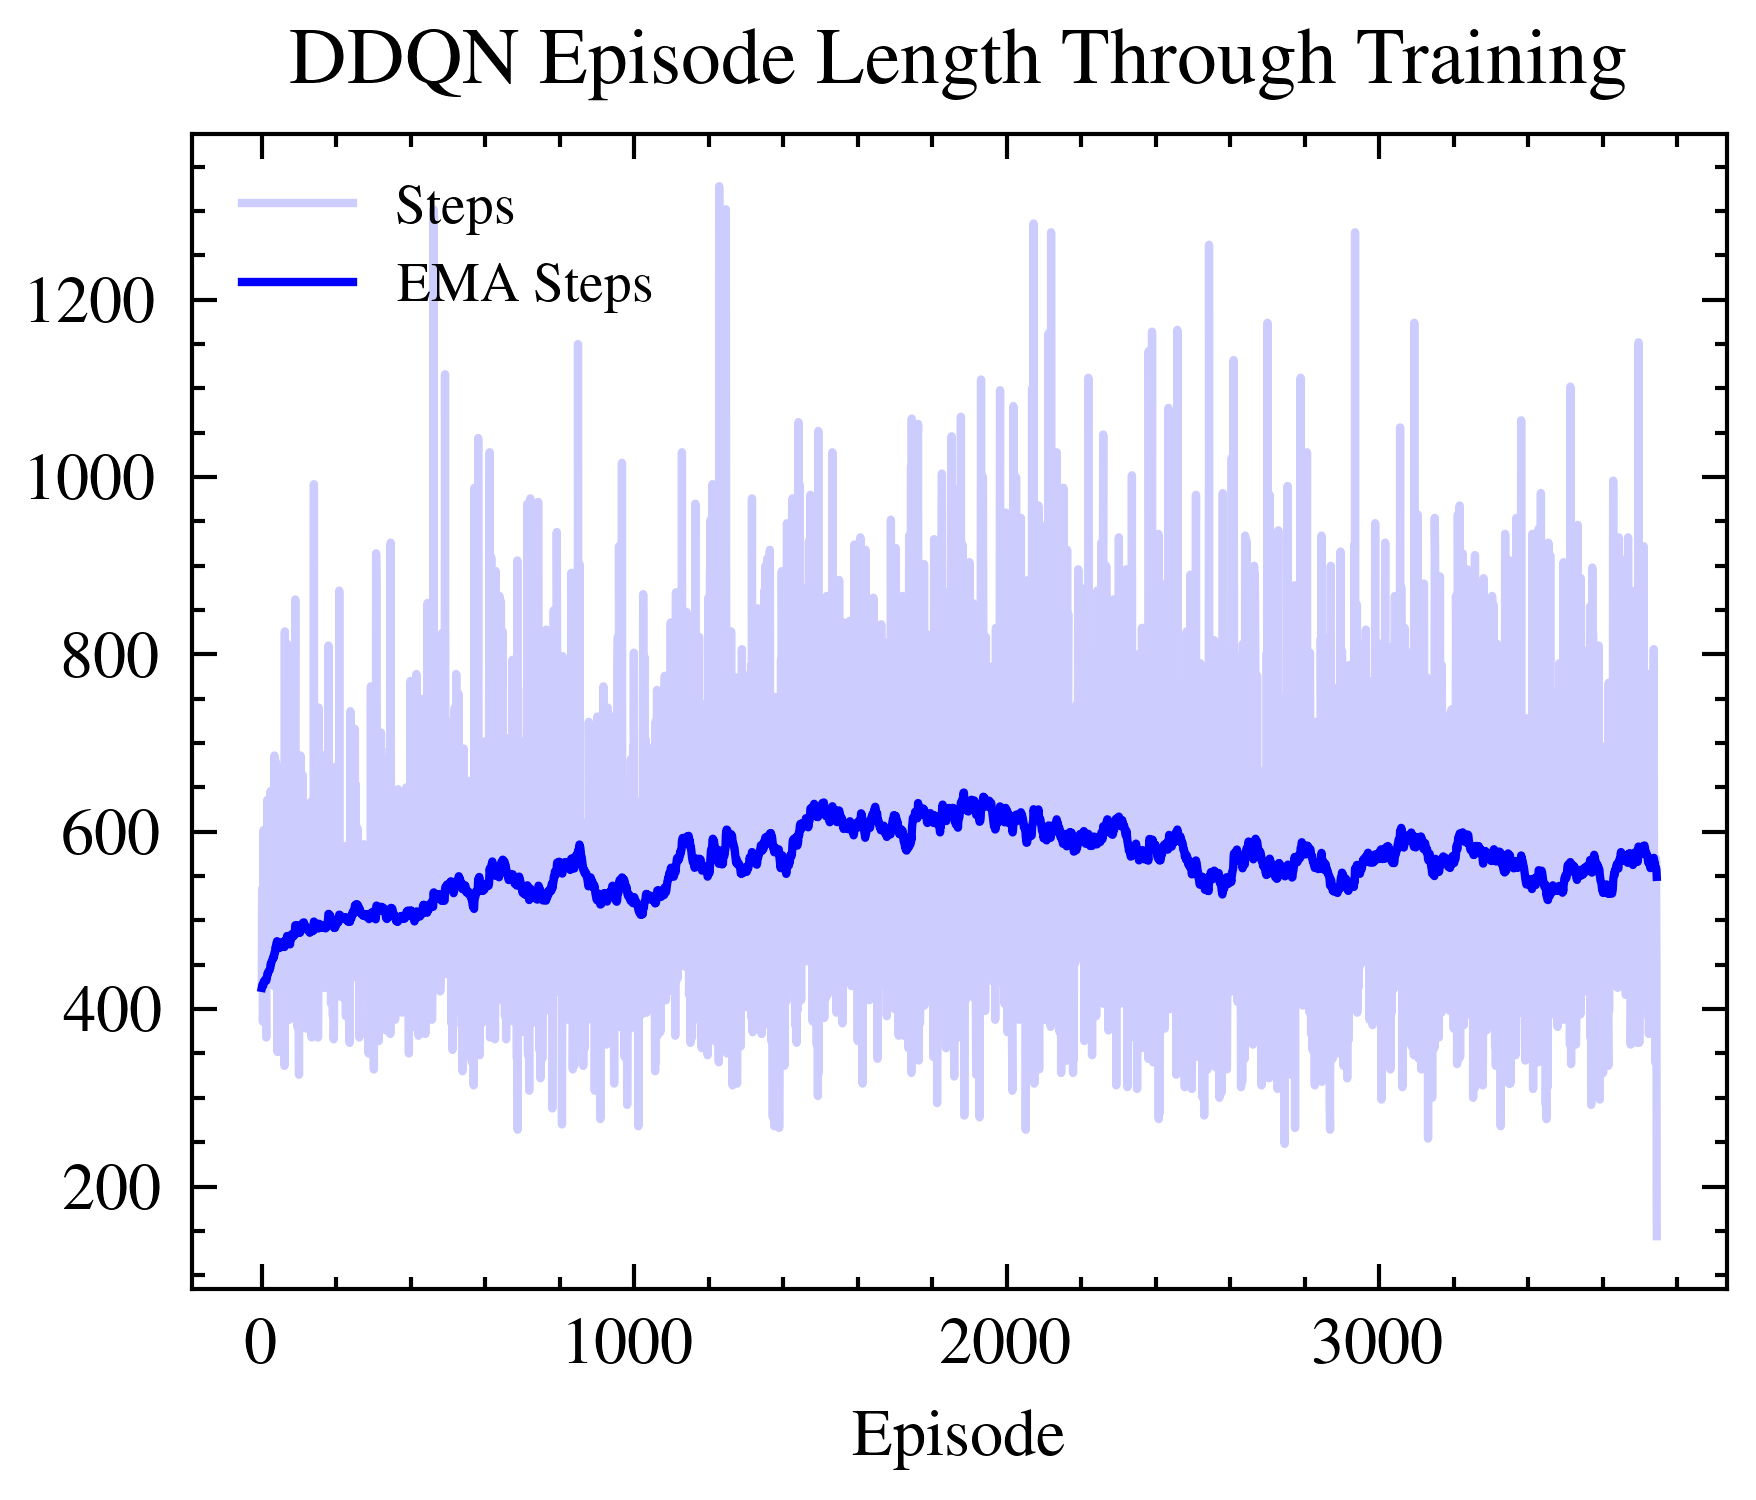

In [39]:
EPISODE_LENGTH_COLUMN = 'step'
df = pd.read_csv('../checkpoints/ddqn/smaller_min_epsilon_higher_discount_factor.csv', index_col=False)
df = df.groupby('episode').max()
df['EMA'] = df[EPISODE_LENGTH_COLUMN].ewm(alpha=0.02, adjust=False).mean()

plt.plot(range(len(df)), df[EPISODE_LENGTH_COLUMN], alpha=0.2, color='blue', label='Steps')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Steps')
plt.legend(fontsize='small')
plt.title('DDQN Episode Length Through Training')
plt.xlabel('Episode')
plt.savefig('plots/ddqn-episode-length.png', dpi=300)

# Loss functions

## PPO

### Entropy Loss

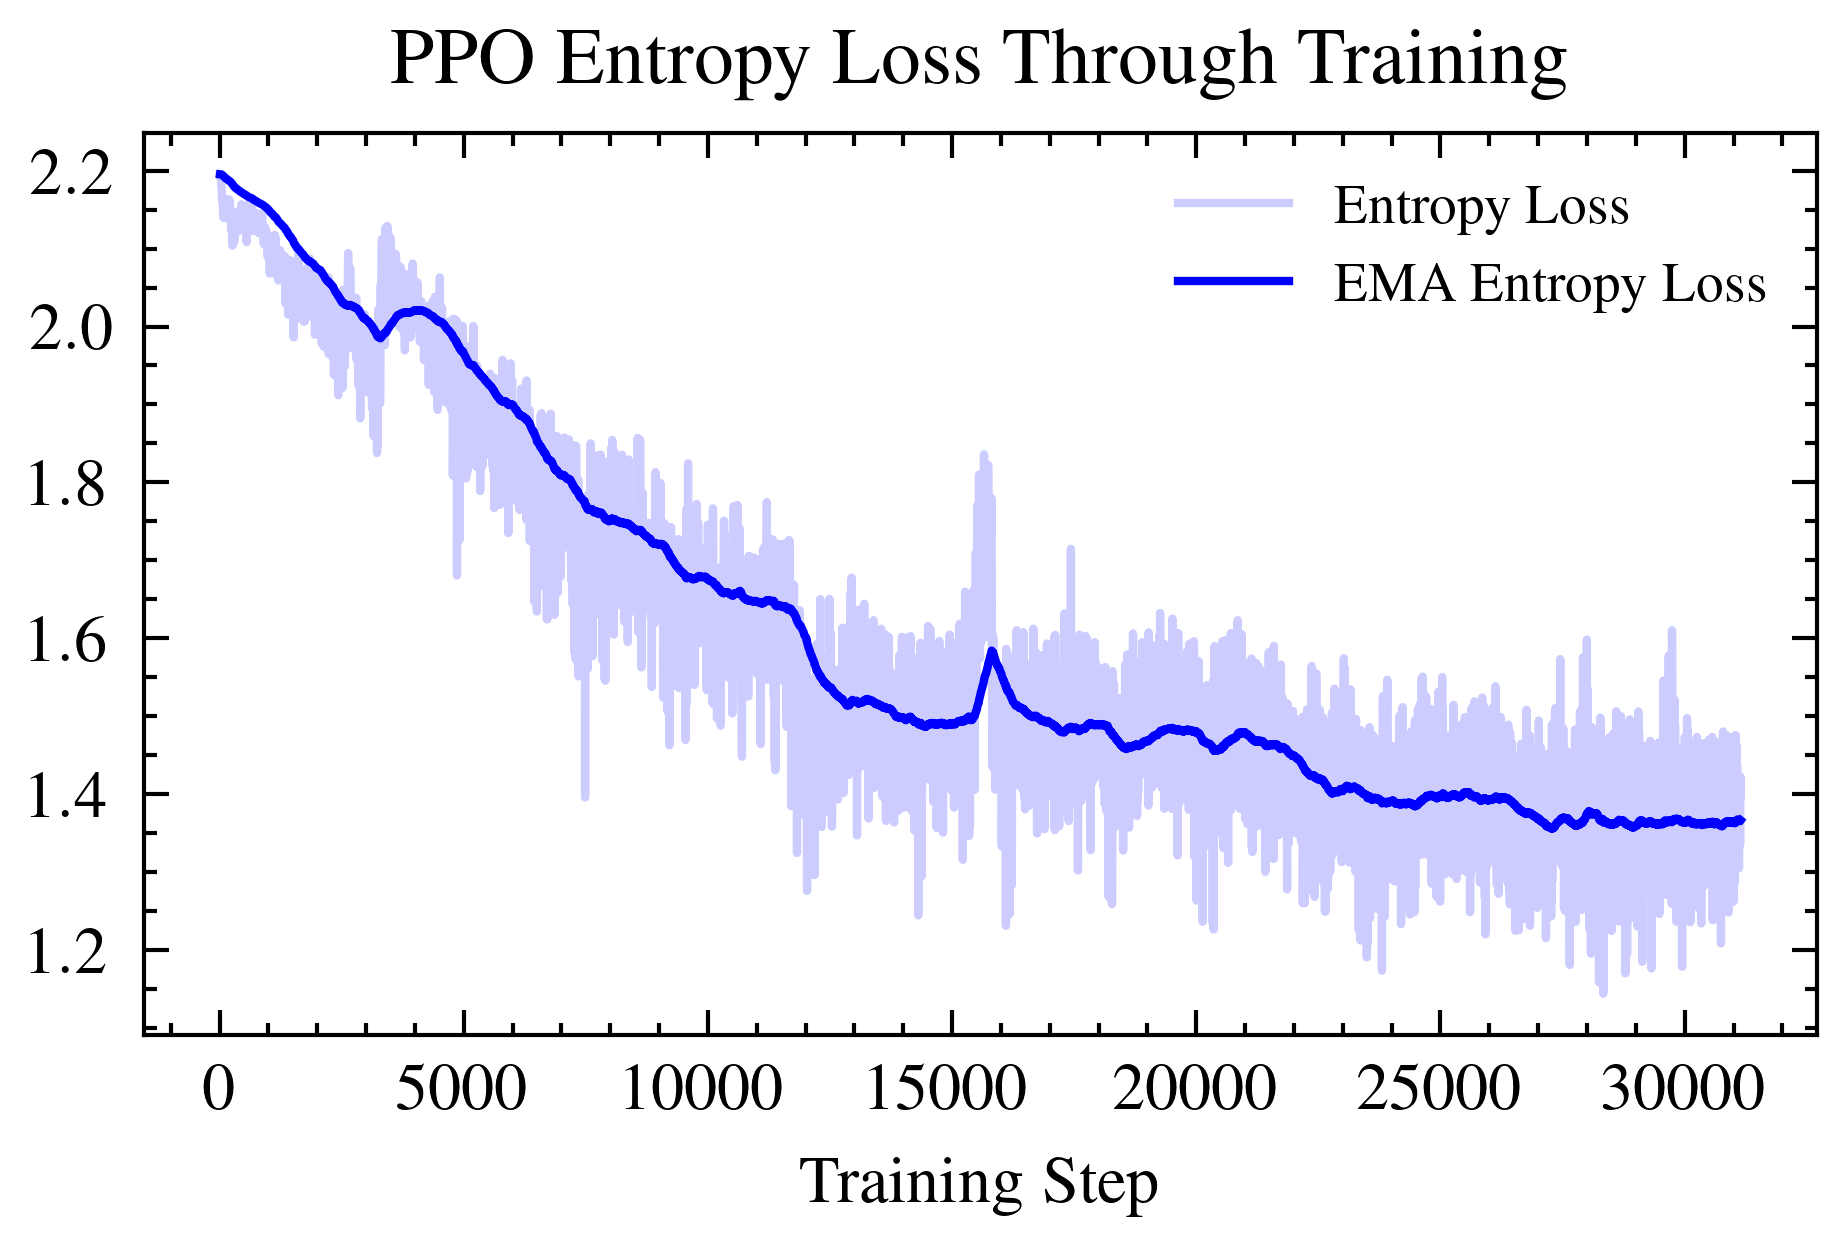

In [71]:
df = pd.read_csv('data/ppo_loss.csv')
df['EMA'] = df['entropy_loss'].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(df['step'], df['entropy_loss'], alpha=0.2, color='blue', label='Entropy Loss')
plt.plot(df['step'], df['EMA'], color='blue', linestyle='-', label='EMA Entropy Loss')
plt.legend(fontsize='small')
plt.title('PPO Entropy Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/ppo-entropy-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Policy Loss

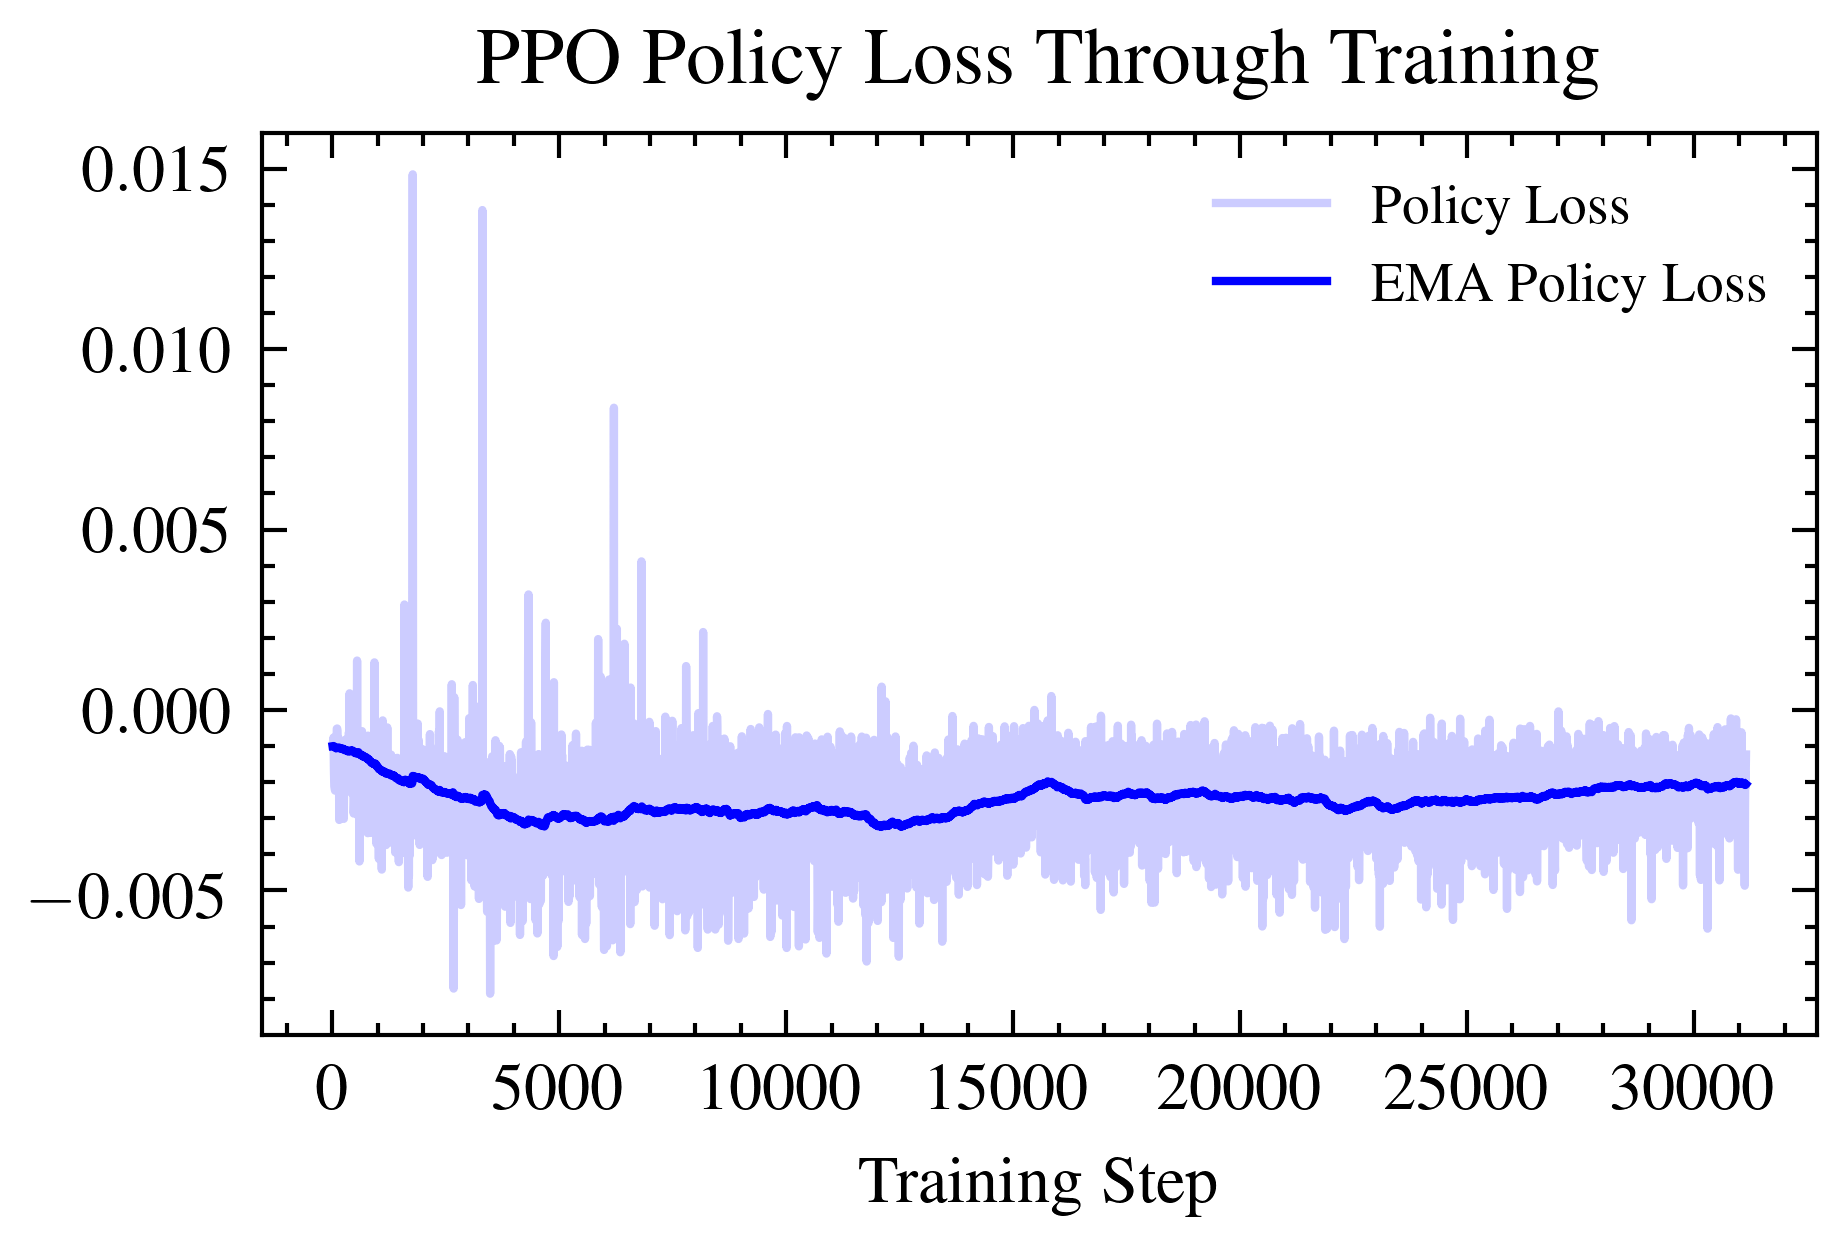

In [72]:
df = pd.read_csv('data/ppo_loss.csv')
df['EMA'] = df['policy_loss'].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(df['step'], df['policy_loss'], alpha=0.2, color='blue', label='Policy Loss')
plt.plot(df['step'], df['EMA'], color='blue', linestyle='-', label='EMA Policy Loss')
plt.legend(fontsize='small')
plt.title('PPO Policy Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/ppo-policy-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

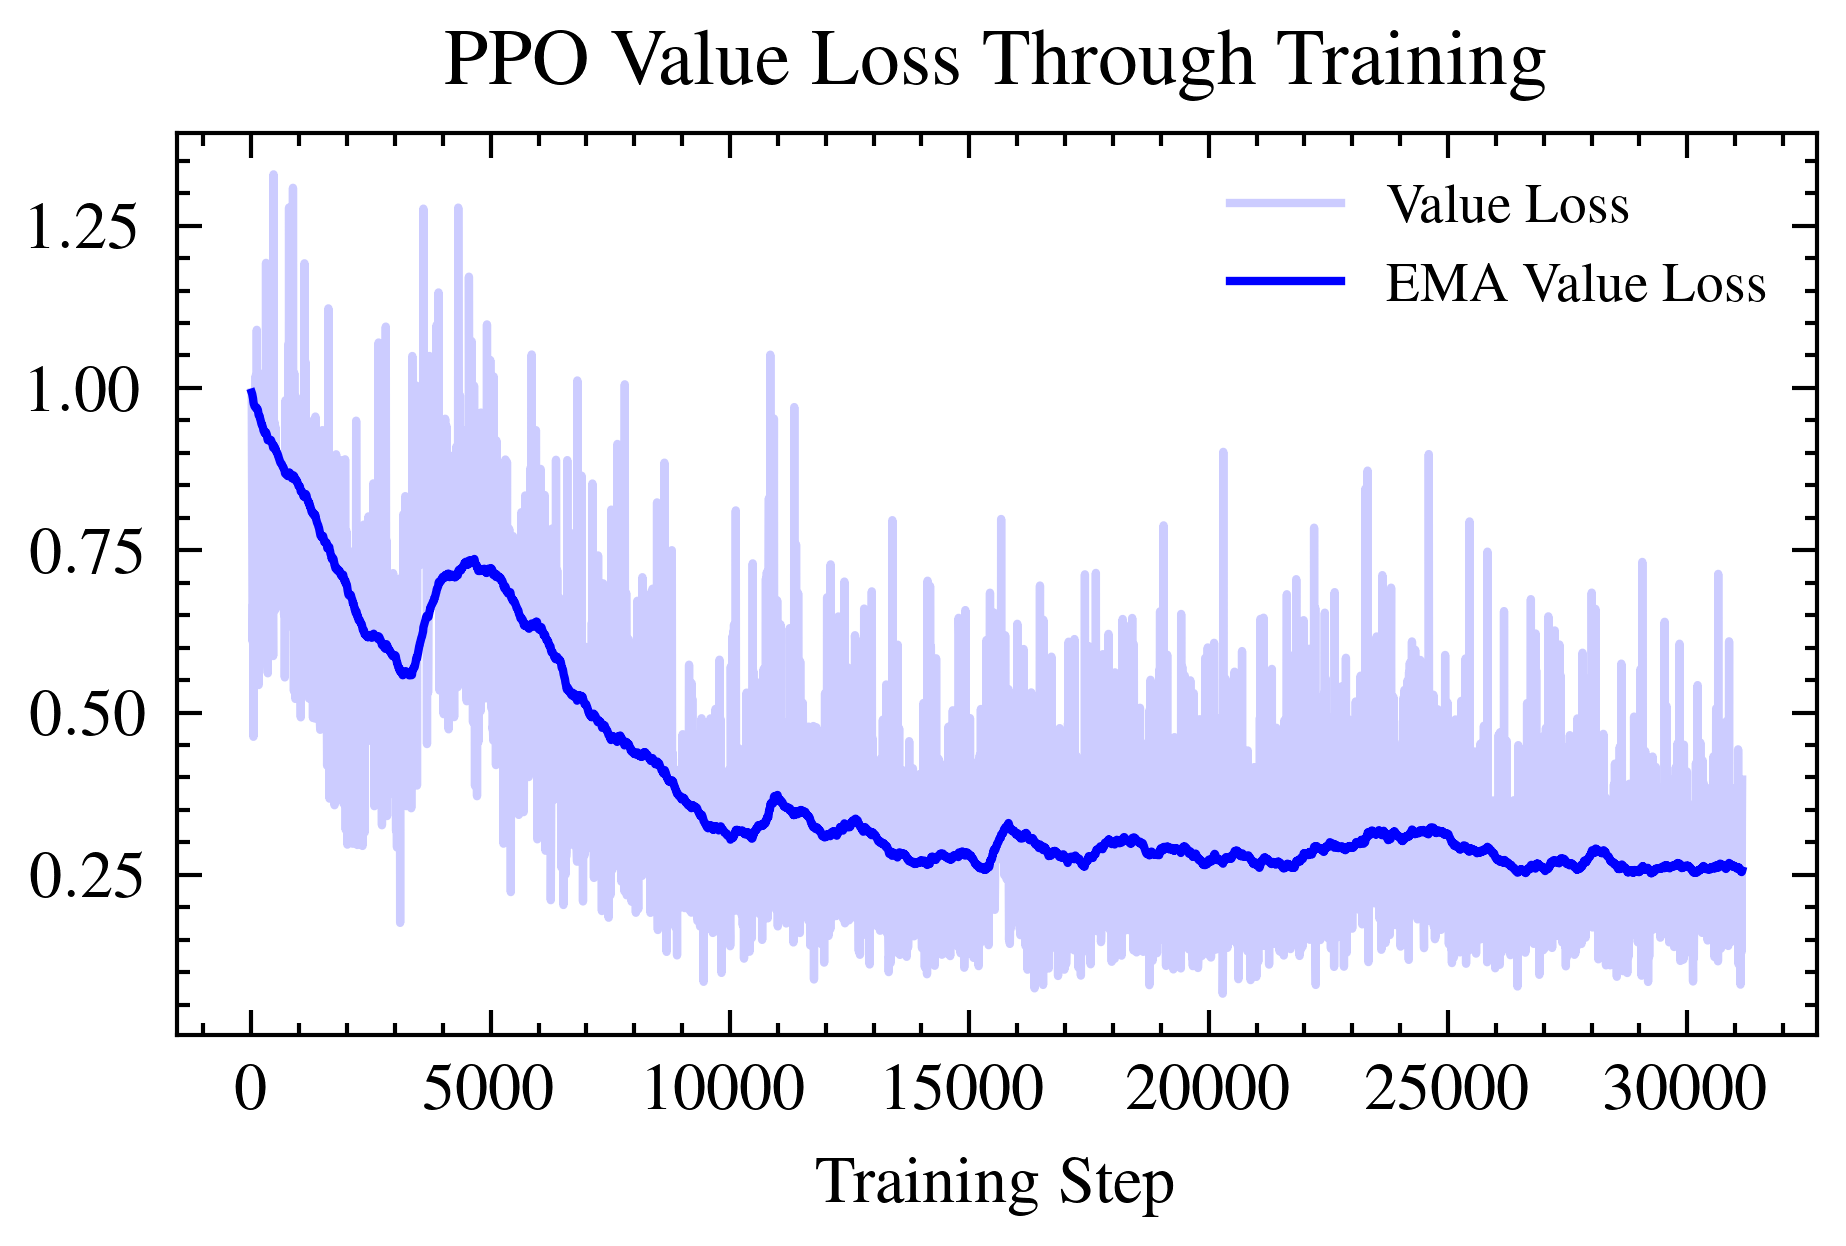

In [73]:
df = pd.read_csv('data/ppo_loss.csv')
df['EMA'] = df['value_loss'].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(df['step'], df['value_loss'], alpha=0.2, color='blue', label='Value Loss')
plt.plot(df['step'], df['EMA'], color='blue', linestyle='-', label='EMA Value Loss')
plt.legend(fontsize='small')
plt.title('PPO Value Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/ppo-value-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

## MuZero

In [69]:
entropy_loss_df = pd.read_csv('data/entropy_loss_ppo.csv')
step_df = entropy_loss_df[['Step']]
step_df.columns = ['step']
entropy_loss_df = entropy_loss_df[['helpful-wave-62 - Entropy Loss']]
entropy_loss_df.columns = ['entropy_loss']

policy_loss_df = pd.read_csv('data/policy_loss_ppo.csv')
policy_loss_df = policy_loss_df[['helpful-wave-62 - Policy Loss']]
policy_loss_df.columns = ['policy_loss']

value_loss_df = pd.read_csv('data/value_loss_ppo.csv')
value_loss_df = value_loss_df[['helpful-wave-62 - Value Loss']]
value_loss_df.columns = ['value_loss']


loss_df = pd.concat([step_df, entropy_loss_df, policy_loss_df, value_loss_df], axis=1)
loss_df.to_csv('data/ppo_loss.csv', index=False)

### Total Loss

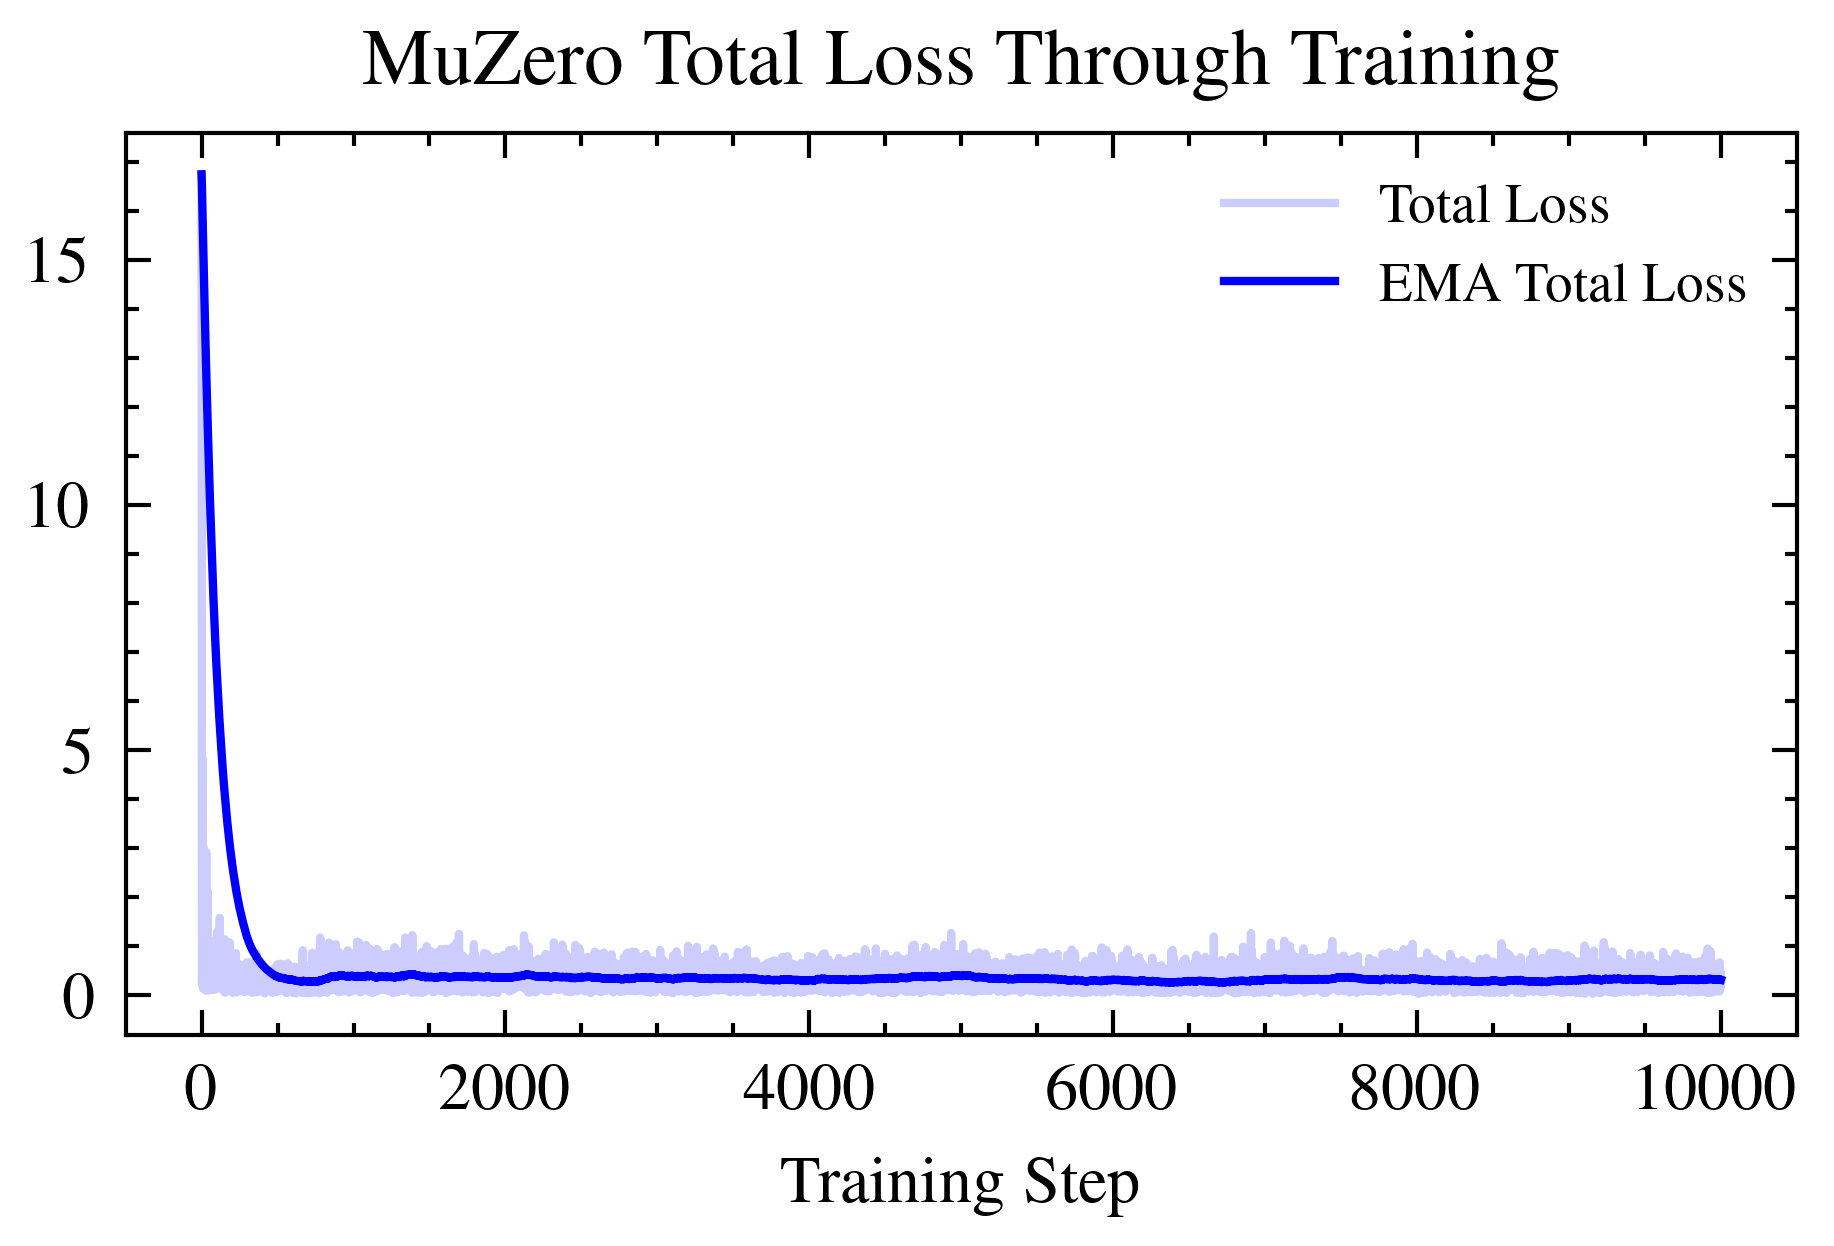

In [45]:
df = pd.read_csv('data/muzero_loss.csv')
df['EMA'] = df['total_loss'].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(range(len(df)), df['total_loss'], alpha=0.2, color='blue', label='Total Loss')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Total Loss')
plt.legend(fontsize='small')
plt.title('MuZero Total Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/muzero-total-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Reward Loss

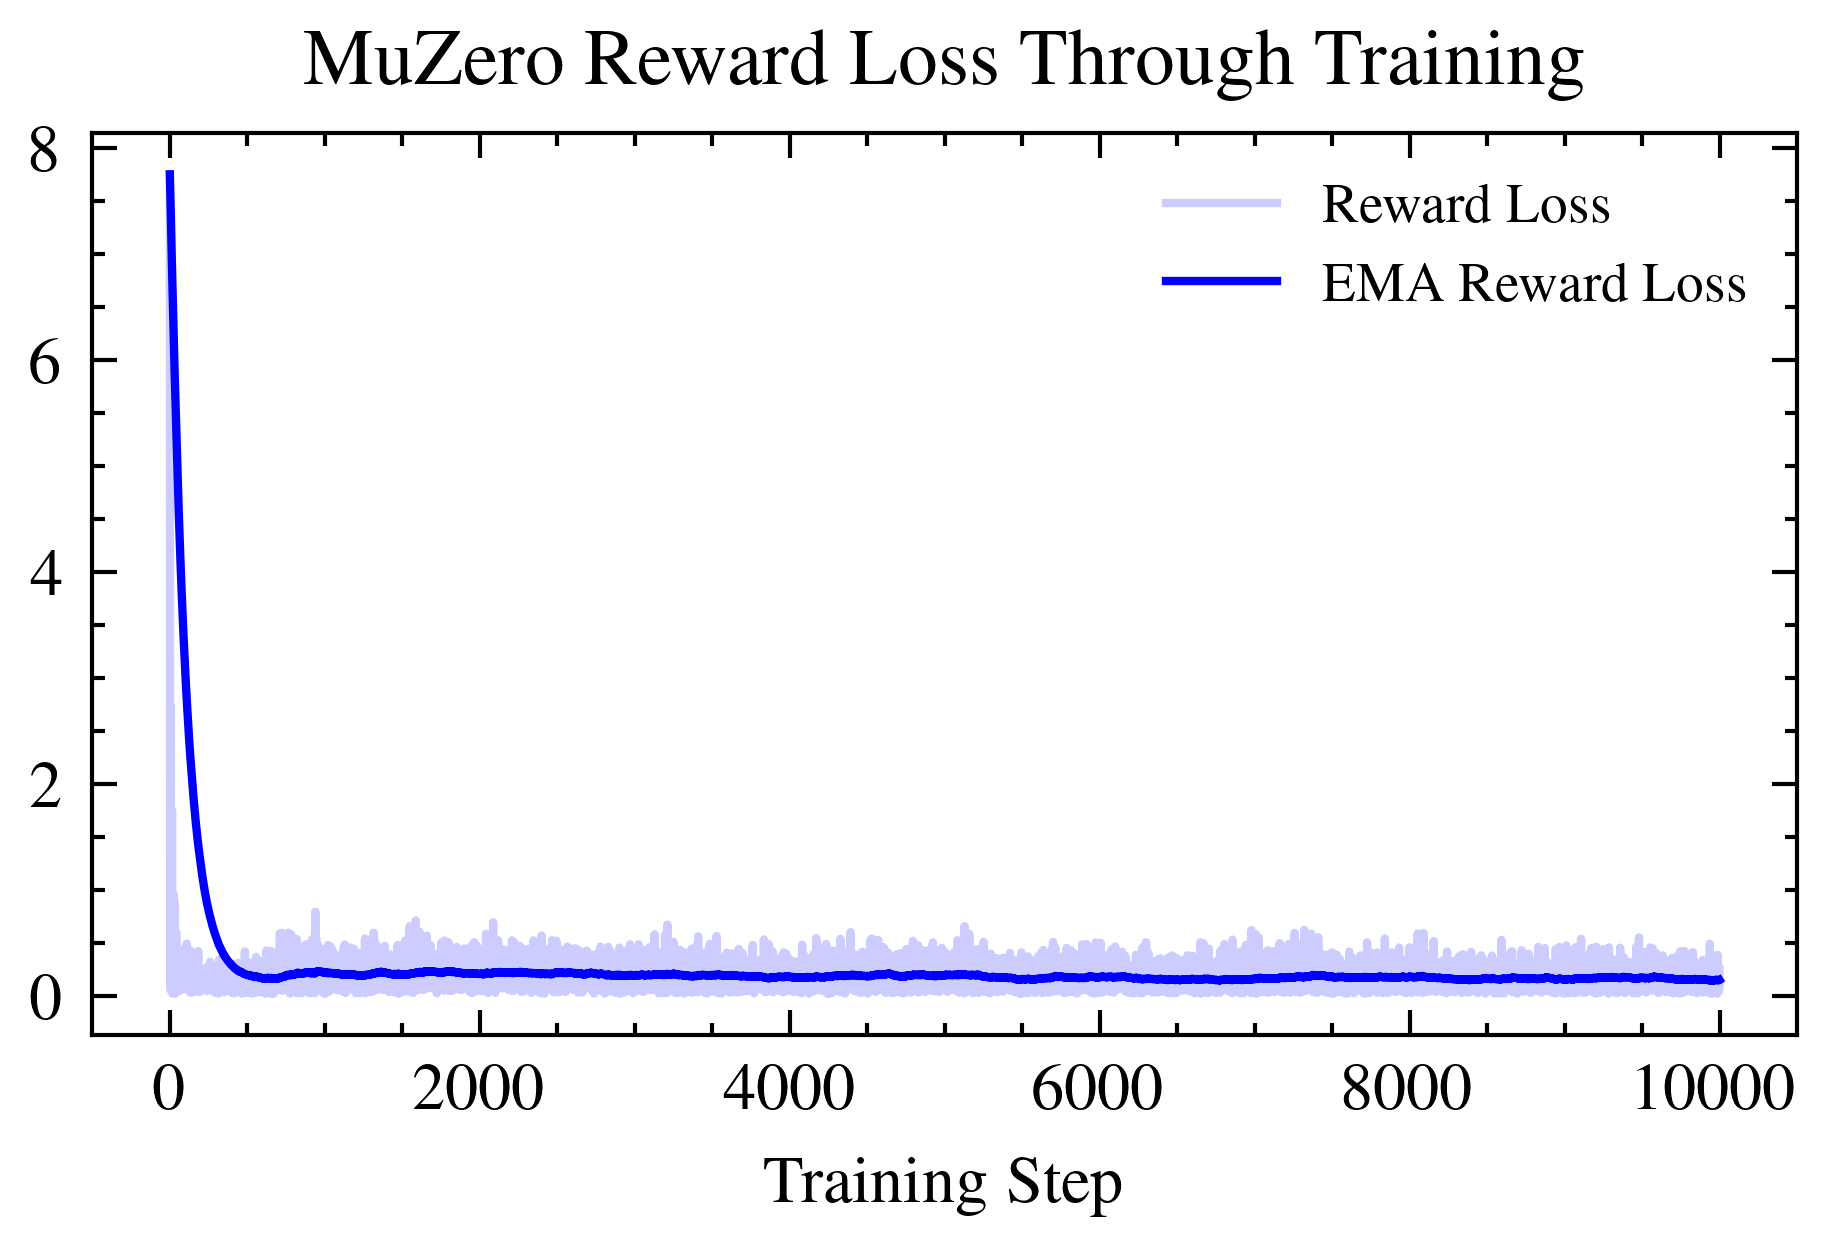

In [46]:
df = pd.read_csv('data/muzero_loss.csv')
df['EMA'] = df['reward_loss'].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(range(len(df)), df['reward_loss'], alpha=0.2, color='blue', label='Reward Loss')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Reward Loss')
plt.legend(fontsize='small')
plt.title('MuZero Reward Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/muzero-reward-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Value Loss

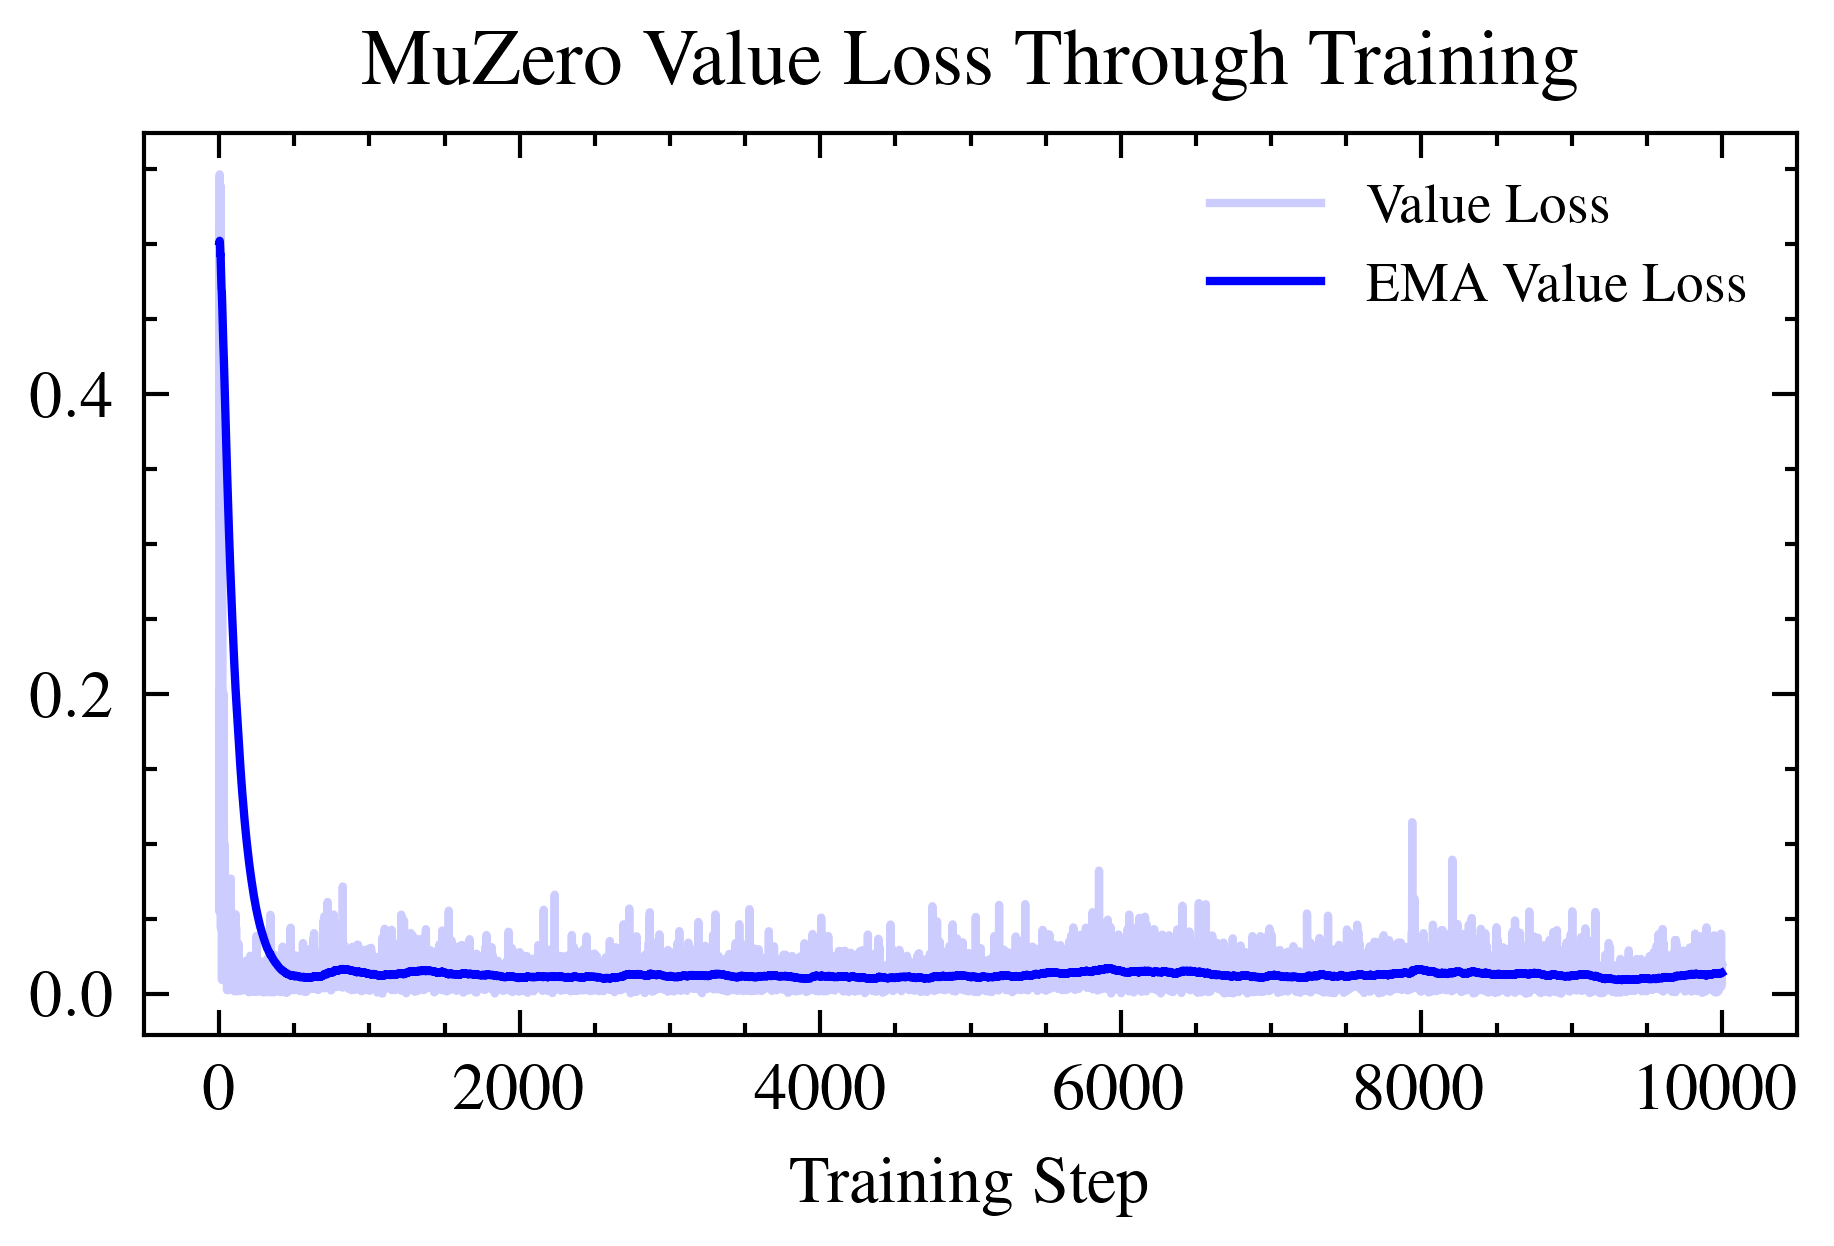

In [44]:
df = pd.read_csv('data/muzero_loss.csv')
df['EMA'] = df['value_loss'][3:].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(range(len(df)), df['value_loss'], alpha=0.2, color='blue', label='Value Loss')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Value Loss')
plt.legend(fontsize='small')
plt.title('MuZero Value Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/muzero-value-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

### Policy Loss

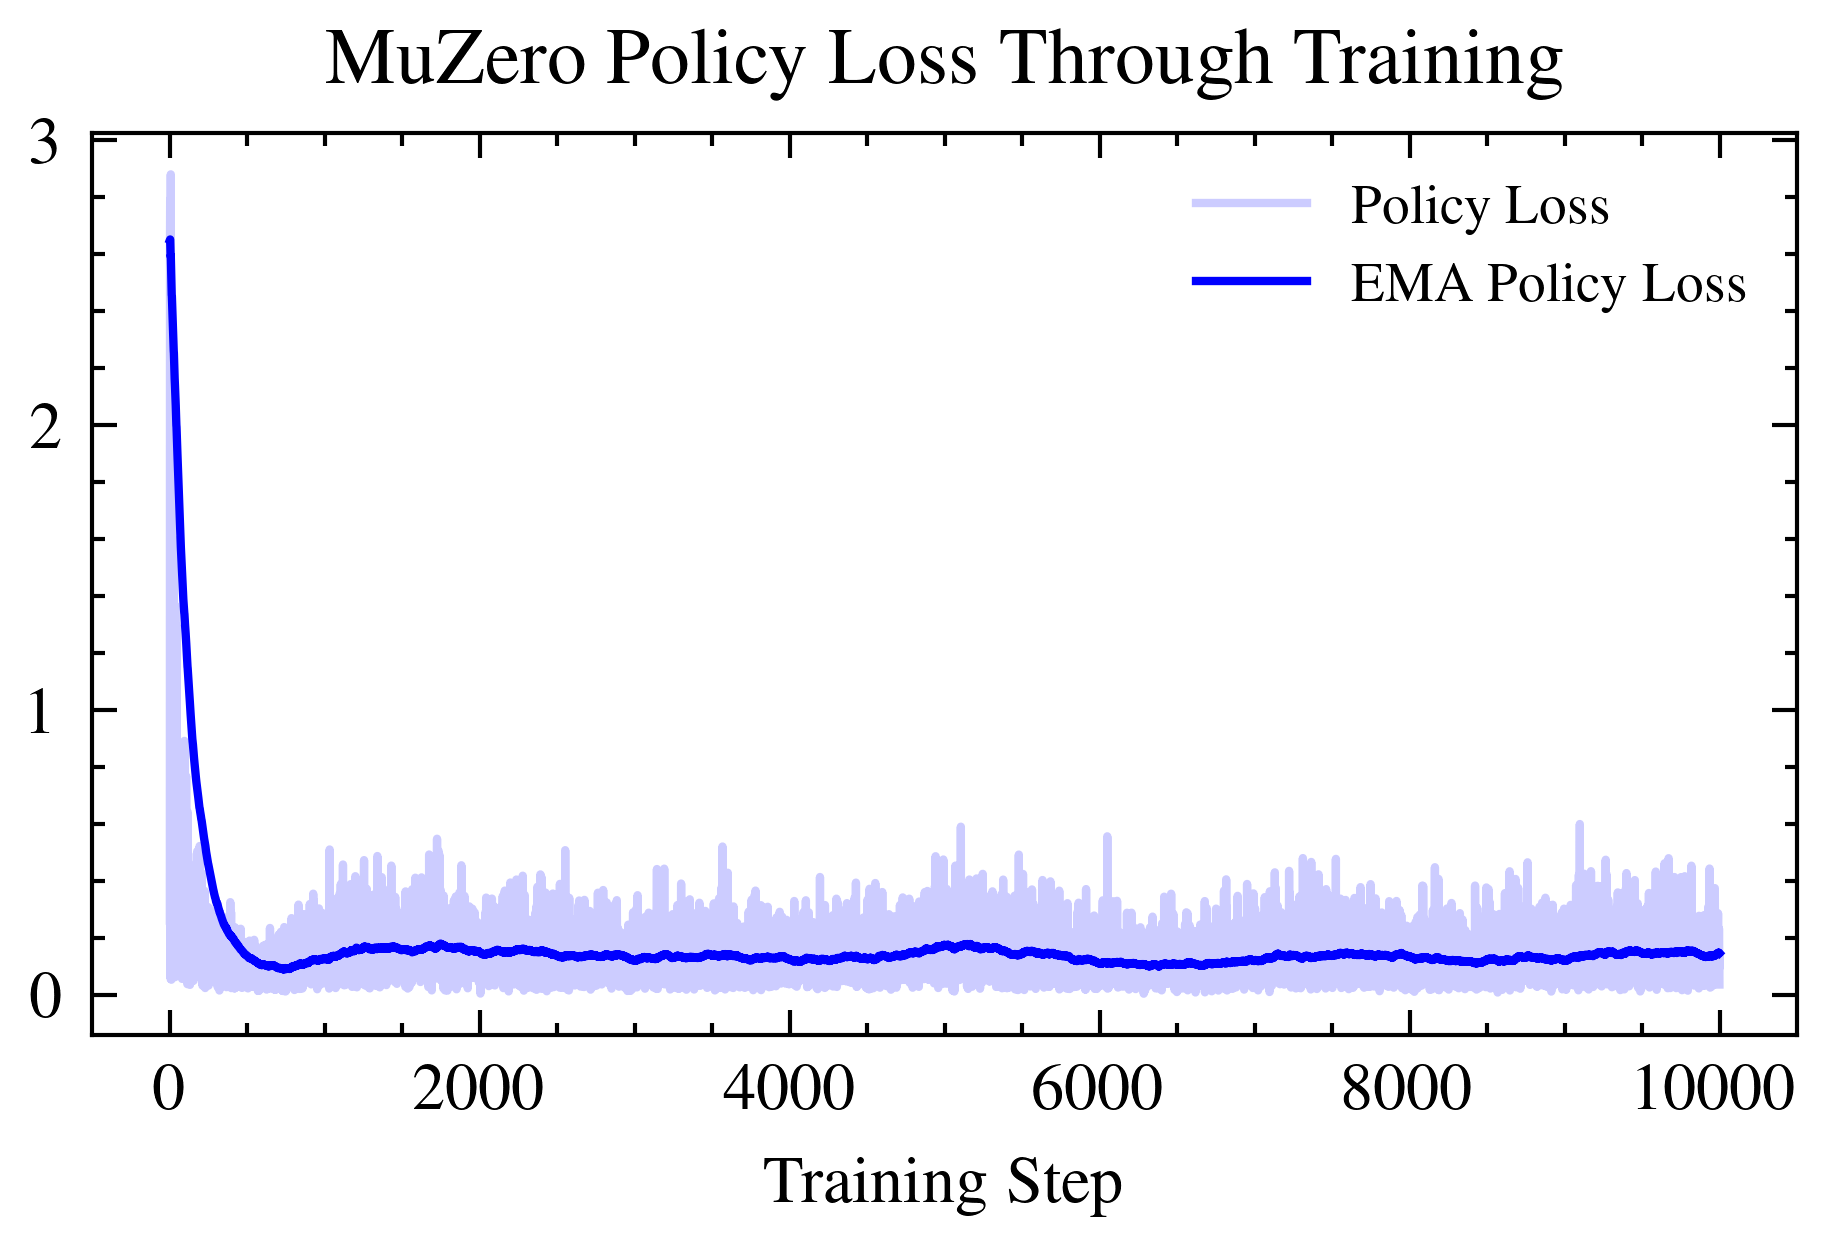

In [77]:
df = pd.read_csv('data/muzero_loss.csv')
df['EMA'] = df['policy_loss'][1:].ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(3, 2))
plt.plot(range(len(df)), df['policy_loss'], alpha=0.2, color='blue', label='Policy Loss')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Policy Loss')
plt.legend(fontsize='small')
plt.title('MuZero Policy Loss Through Training')
plt.xlabel('Training Step')
plt.tight_layout(pad=0.1)
plt.savefig('plots/muzero-policy-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

## DDQN

In [75]:
df = pd.read_csv('../checkpoints/ddqn/smaller_min_epsilon_higher_discount_factor.csv', index_col=False)
df = df.groupby('episode')[['loss']].mean()
df['EMA'] = df['loss'][1:].ewm(alpha=0.01, adjust=False).mean()

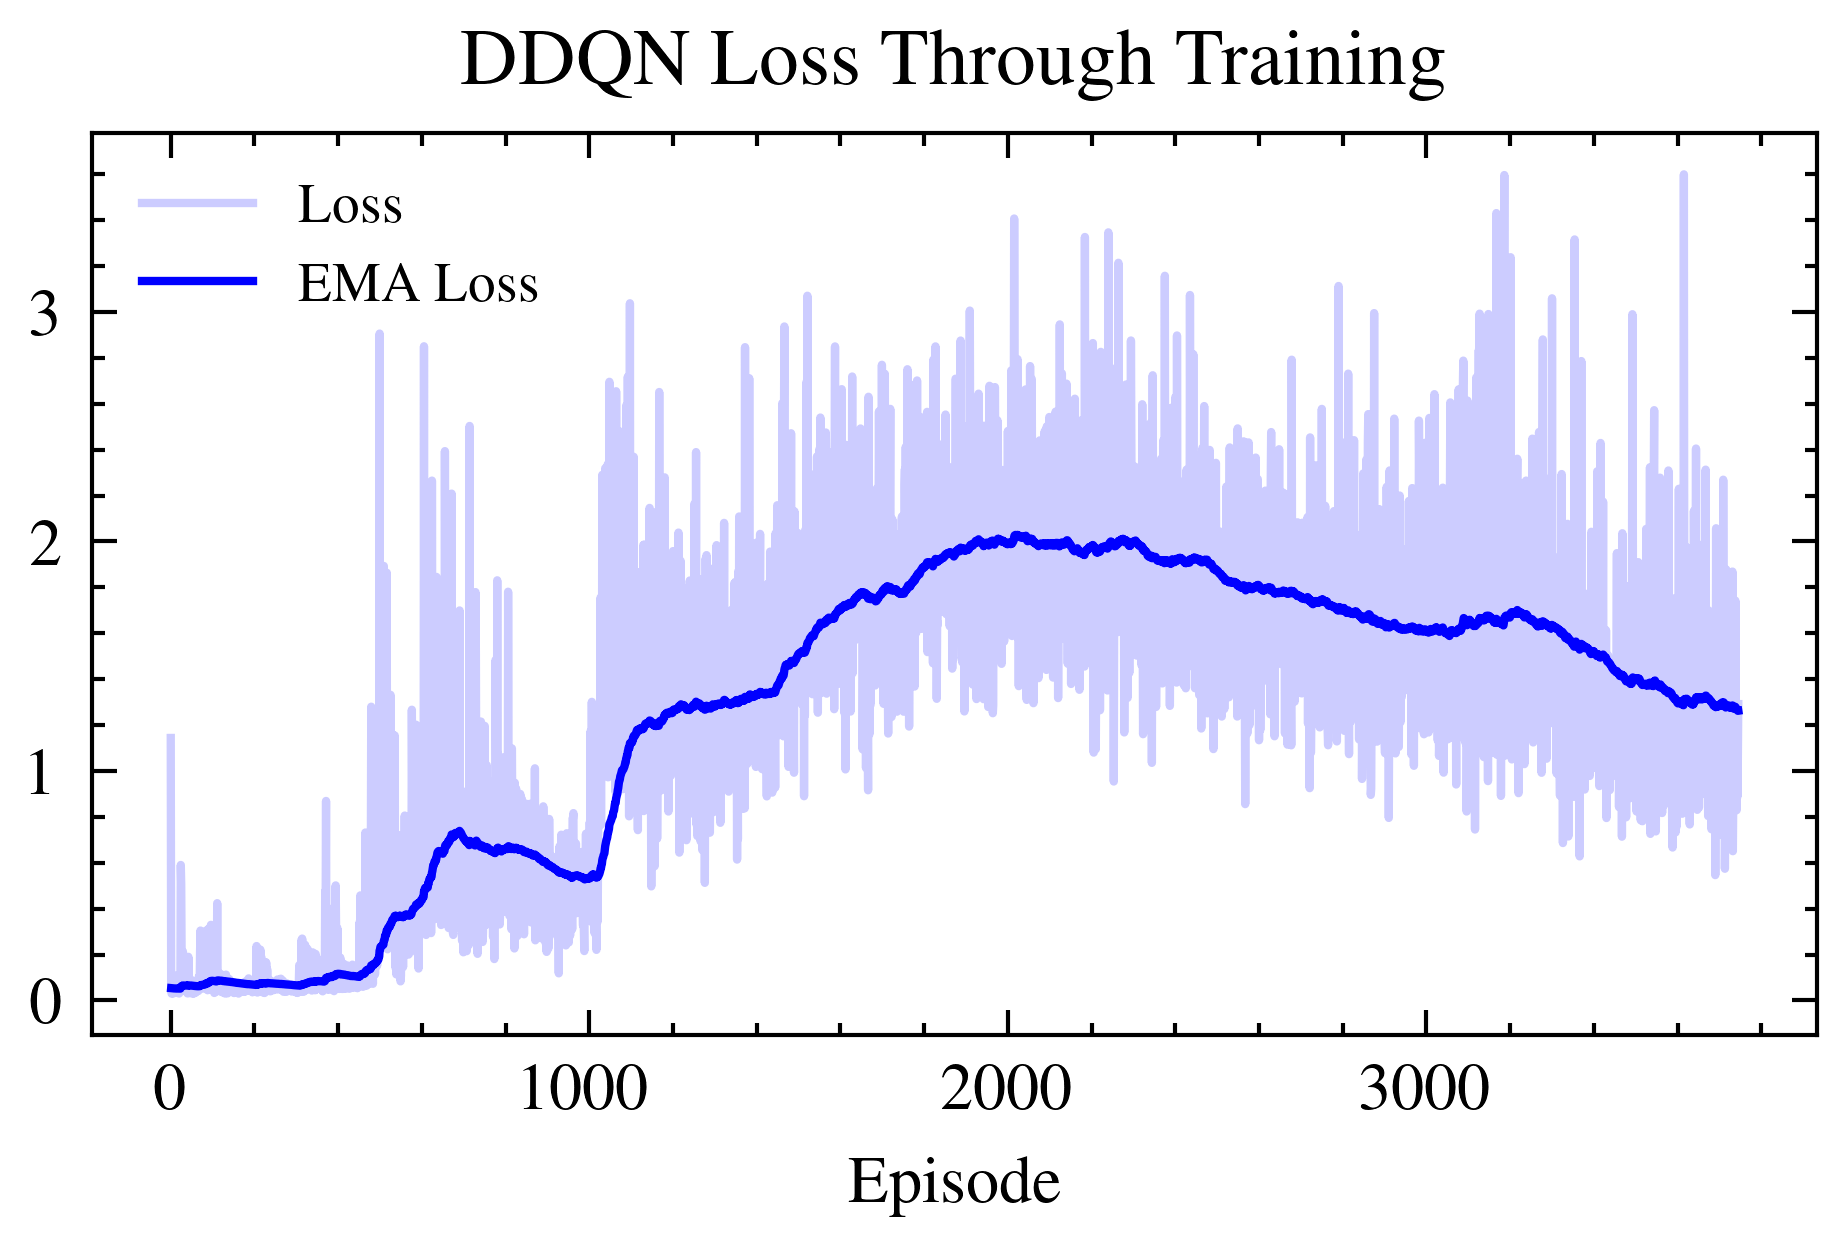

In [76]:
plt.figure(figsize=(3, 2))
plt.plot(range(len(df)), df['loss'], alpha=0.2, color='blue', label='Loss')
plt.plot(range(len(df)), df['EMA'], color='blue', linestyle='-', label='EMA Loss')
plt.legend(fontsize='small')
plt.title('DDQN Loss Through Training')
plt.xlabel('Episode')
plt.tight_layout(pad=0.1)
plt.savefig('plots/ddqn-policy-loss.png', dpi=300, bbox_inches='tight', pad_inches=0.1)